## Module 4 Assignment -1 Feature Selection and Dimensionality Reduction
By Group 2: Jyothi K Vishwanath, Praveen Maranur, Niyanta Pandey, Dheeraj Shankar


## INTRODUCTION

Using a dataset with 61 features, we explore various machine learning techniques to identify the key drivers of article success. The dataset includes features such as token counts, sentiment scores, publication channels, and metadata like the day of the week. Given the high dimensionality of the dataset, feature selection and dimensionality reduction are critical to enhance model performance and interpretability. Principal Component Analysis (PCA) is applied to reduce the dataset's complexity while retaining the most relevant information. The final model is trained using XGBoost, a powerful gradient boosting algorithm, optimized through hyperparameter tuning.

### Steps to Solve the Problem:

We performed the following steps to train our model: 

1. Exploratory Data Analysis (EDA): Analyzed the data's distribution, correlations, and patterns to form hypotheses about factors influencing shares.
2. Feature Selection & Dimensionality Reduction: Applied PCA to reduce dimensionality, focusing on key features like text length and sentiment.
3. Regression Model and Evaluation : Trained models starting with linear regression and evaluated performance using K-fold cross-validation, assessing R² and MSE. Also, optimized model performance with XGBoost and PolyFit Linear Regression to improve accuracy and address overfitting.
5. Conclusion: Provide a summary of findings and the impact of our data preparation.

 ### Our Approach

The following steps, from Exploratory Data Analysis (EDA) to data preparation, were carried out for each column in the dataset:

- **Grouping of Columns**: Based on the data dictionary, columns were grouped by their description.
- **Correlation Analysis**:
  - Analyzed intra-group correlations between columns.
  - Assessed correlations between columns and the target variable.
- **Feature Selection**:
  - Dropped features with high correlation within each group.
  - Retained columns that were not correlated among themselves but had strong correlation with the target variable.



In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Creating utility functions:

In this section, we define a set of utility functions to streamline the process of visualizing data for exploratory analysis. These plot will help in understanding the distribution, relationships, and patterns within the dataset. The following plotting functions are included:

In [190]:
#Utility functions for plotting graphs
# Box plot
def box_plot(df , x):
  sns.set(style="whitegrid")
  sns.boxplot(data=df, x=x,)
  plt.xlabel(x)
  plt.title('Boxplot for '+x)
  plt.show();


# Count plot
def count_plot(df, x):
  sns.set(style="whitegrid")
  sns.countplot(data=df, x=x)
  plt.xlabel(x)
  plt.title('Countplot for '+x)
  plt.show();

# Histplot
def hist_plot(df, x):
  plt.figure(figsize=(10, 6))
  sns.set(style="whitegrid")
  sns.histplot(data = df, x = x, bins=30)
  plt.xlabel(x)
  plt.title('Histogram for '+x)
  plt.show();


# Heat map
def heat_map(df, group):
  plt.figure(figsize=(14,10))
  sns.heatmap(df.corr(), annot=True)
  plt.title("HeatMap for "+group)
  plt.show();

### Using Logarithmic Transformation


This function specifically uses np.log1p, which applies the natural logarithm transformation while handling zero values gracefully by adding 1 to the input before taking the log. The transformed data becomes more normalized, which can improve model performance and interpretability.

In [191]:
# Utility function for log scaling:
def log_scaling(df, col_name):
  df_log = np.log1p(df[col_name])
  return df_log

In [192]:
#Utility function for removing columns from group function:
def remove_col(df,list_col):
  new_list = []
  all_col = df.columns
  for i in list_col:
    if i in all_col:
      new_list.append(i)
  return new_list

### Loading the dataset in GitHub and Reading the CSV

In [193]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jk-vishwanath/DAV-6150/refs/heads/main/M4_Data.csv')

In [194]:
df.shape

(39644, 61)

**There are 39644 rows and 61 columns in our dataset**

In [195]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505



### Dropping non-predictive variables from the dataset
Dropping first 2 columns since these dont contribute towards target variable.

In [196]:
df = df.iloc[:,2:]

In [197]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [198]:
#Removing unwanted spaces in the column names
new_col_name = []
for i in df.columns:
  i =i[1:]
  new_col_name.append(i)

In [199]:
df.columns = new_col_name

#EDA:

# Grouping columns based on their nature:
Grouping the data allows us to gain valuable insights and improves our overall analysis. By understanding the different attributes, we can identify which columns are truly necessary and determine if any adjustments are needed to enhance the dataset's usability.


According to the data dictionary, the features url and timedelta are considered non-predictive, so we are excluding them from our dataset.

     0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)

### Group 1: Content and Metadata Features:
     
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata

### Group 2: Data Channel Features:
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?

### Group 3: Keyword Features:
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)

### Group 4: Self-reference Features:

    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable

### Group 5: Publication Day Features:
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?

### Group 6: LDA Topic Features:
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4

### Group 7: Sentiment and Polarity Features:
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level

### Target
    60. shares:                        Number of shares (target)




In [200]:
group1 = ['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'shares']

group2 = [ 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'shares']

group3 = [ 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'shares']

group4 = ['self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'shares']

group5 = ['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'shares']

group6 = [ 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'shares']

group7 = ['global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

Target = 'shares'

### Group 1 Analysis: 

This group focuses on metrics related to the content of the articles, including the number of words, links, images, and overall engagement (shares).

In [201]:
group1

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'shares']

In [202]:
df[group1].describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,843300.000000


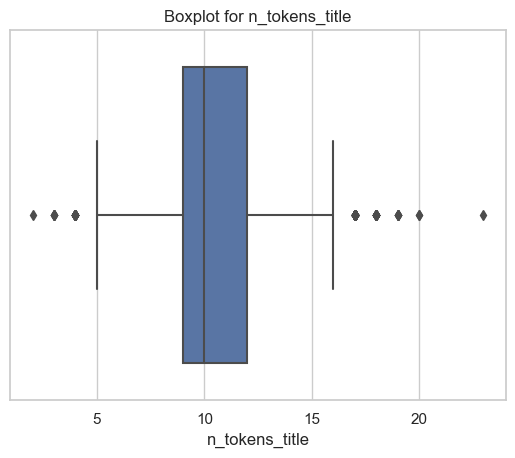

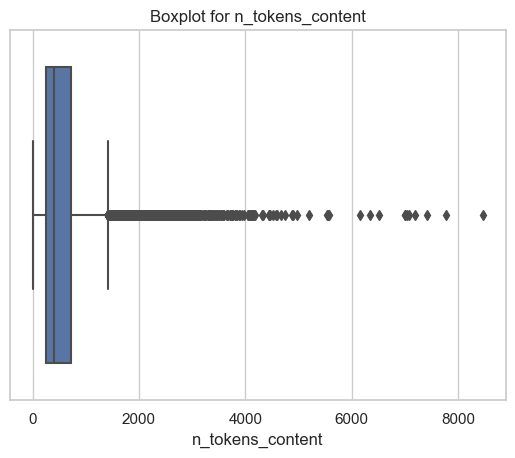

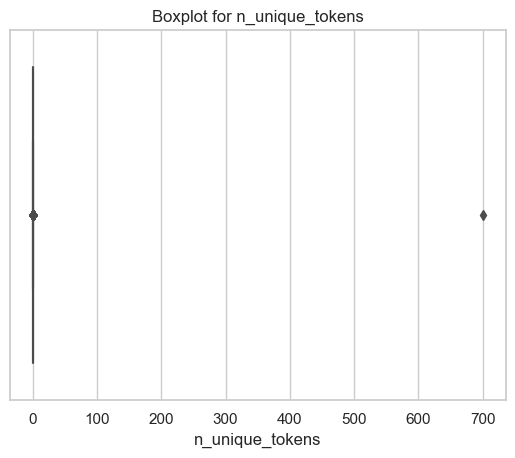

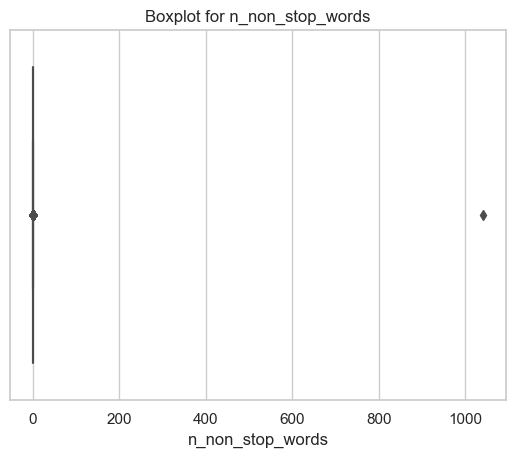

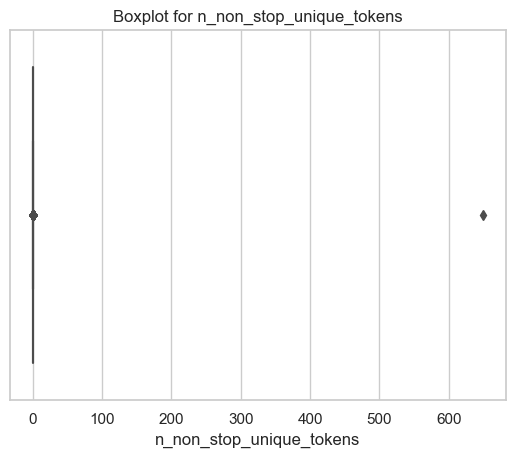

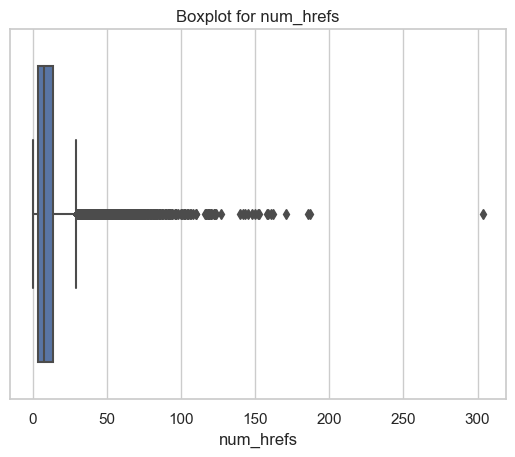

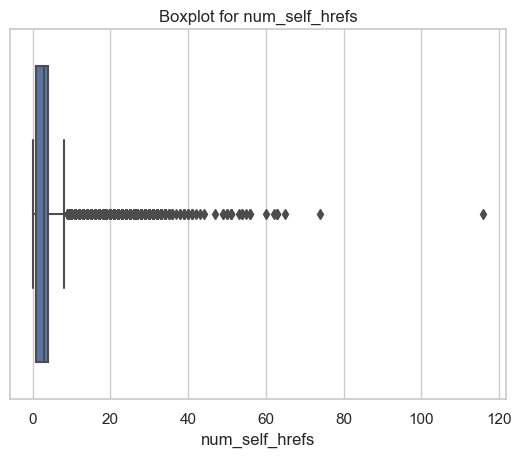

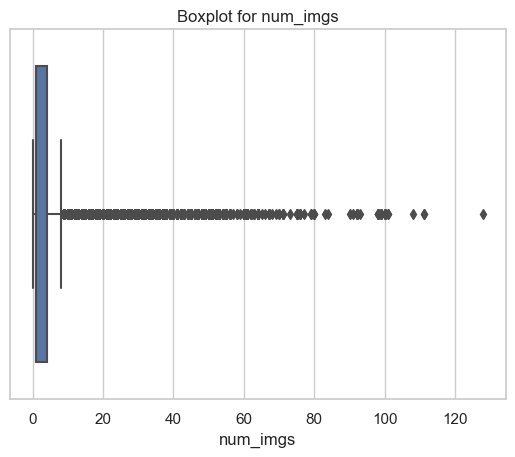

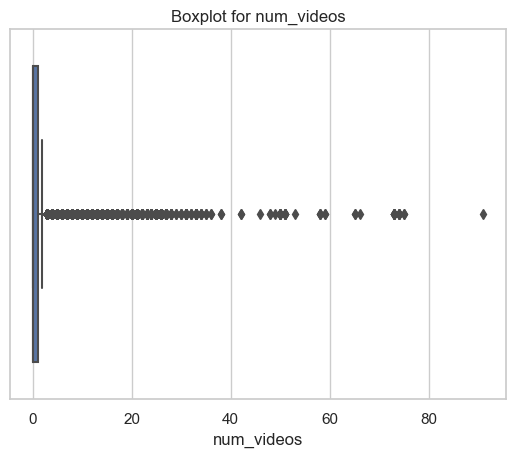

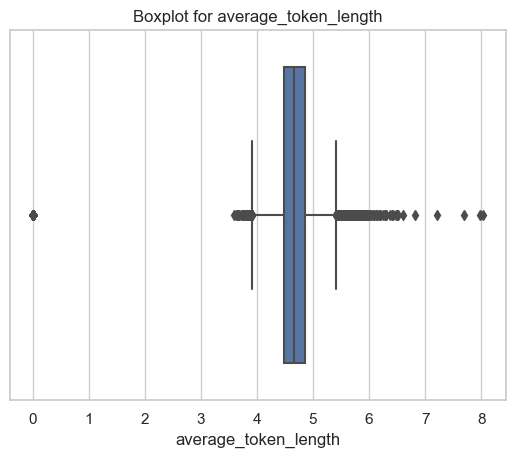

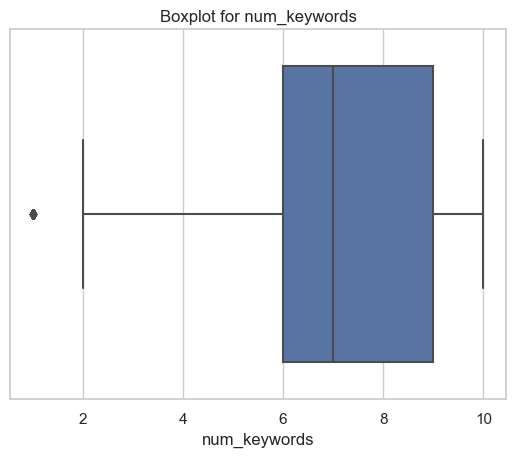

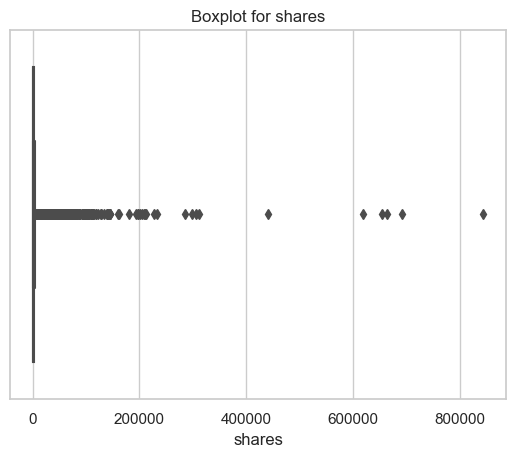

In [203]:
# BoxPlotting for all Group1 features
for i in group1:
  box_plot(df,i)
  print("\n")

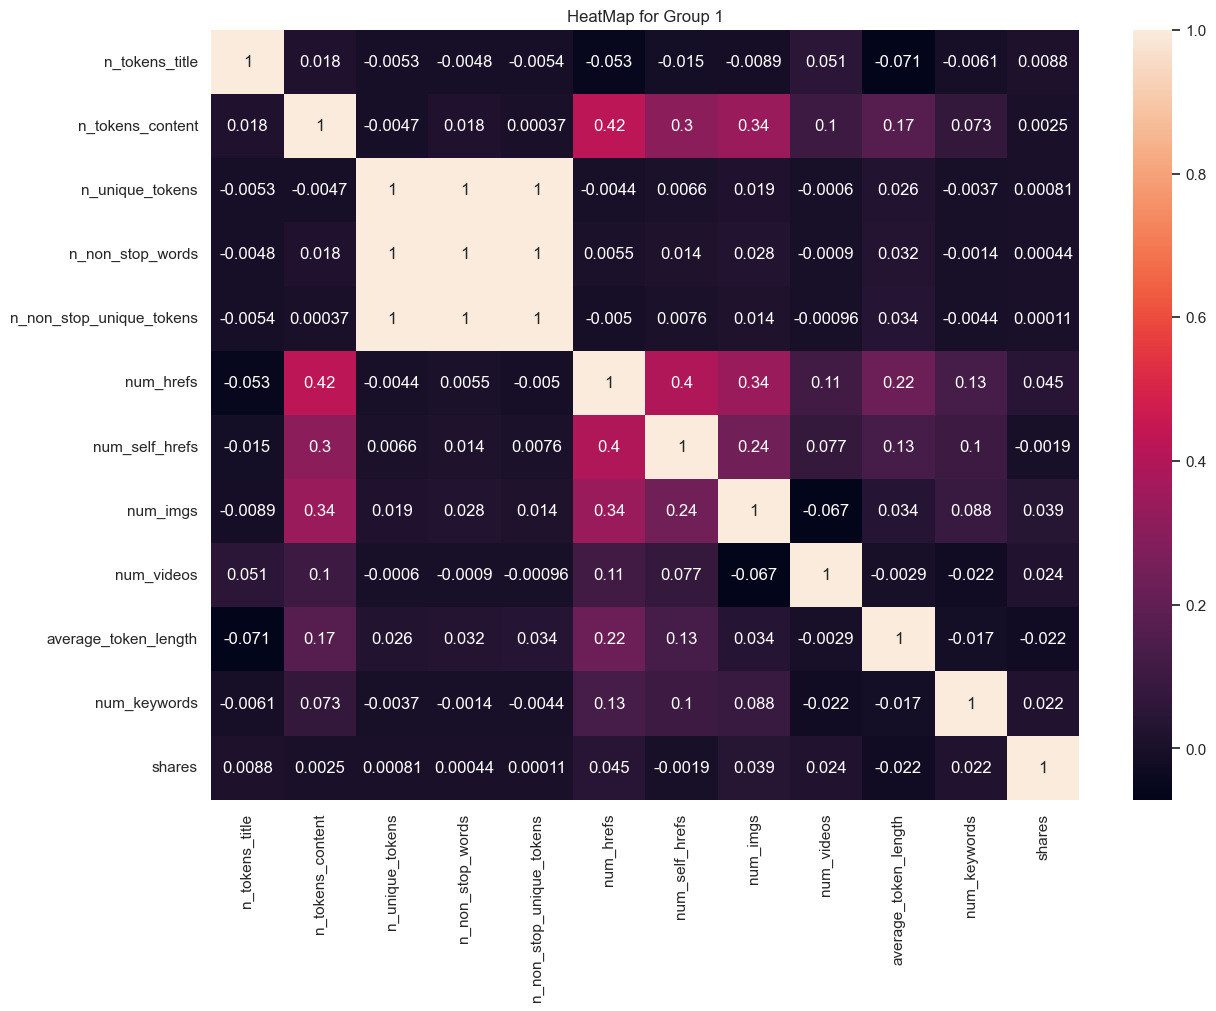

In [204]:
#plotting heatmap to check the correlation
heat_map(df[group1], 'Group 1')

## Observations
- Most features show right-skewed distributions, indicating that a small number of articles have significantly higher values than the majority.
- Content length (n_tokens_content) varies widely, with some extremely long articles.
- The number of unique words and non-stop words follows a more normal distribution.
- Media elements (images, videos) and links are sparse in most articles but abundant in a few.
- Most articles use between 5 to 10 keywords, with 7-8 being the most common.
- There's a significant gap between typical sharing activity and the most viral content in the outliers of boxplot.

### Plotting Histplot to understand the distribution of the data

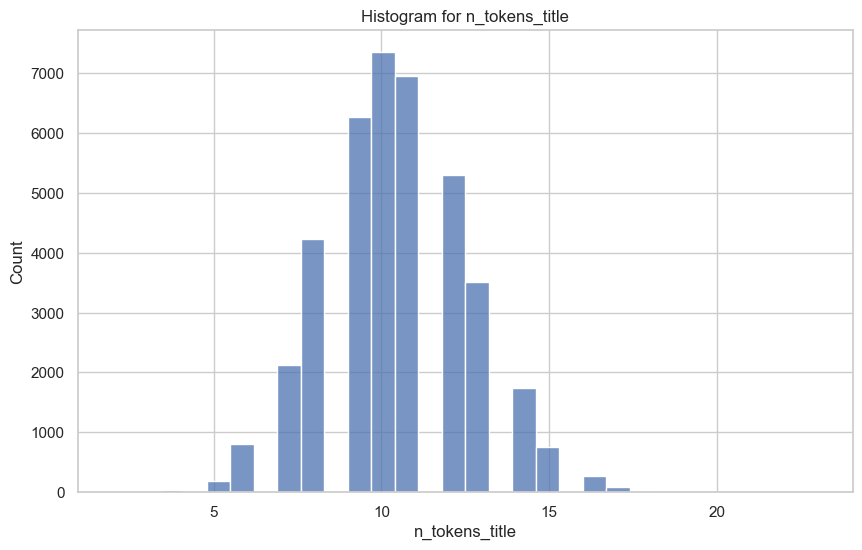

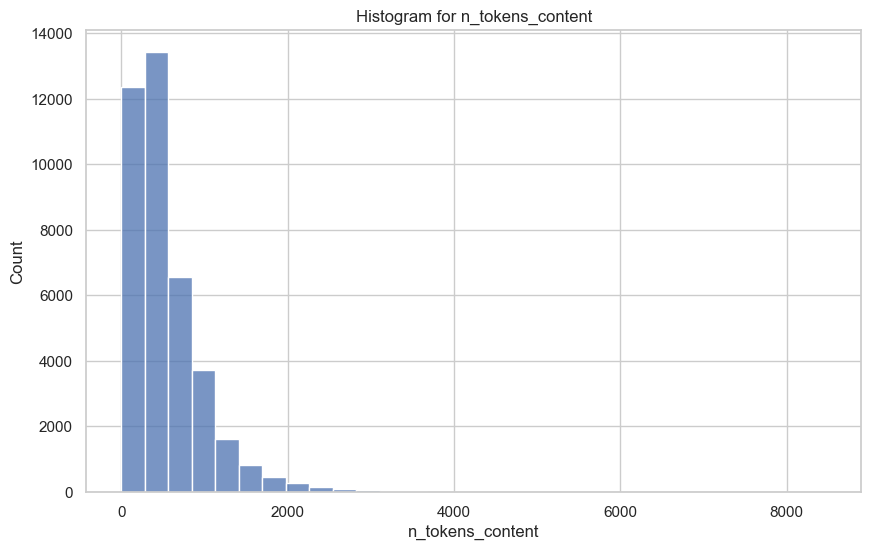

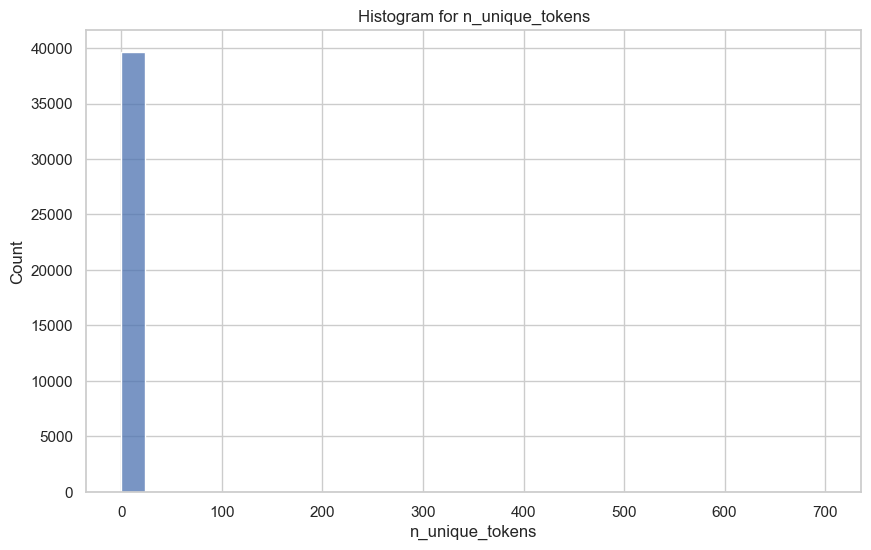

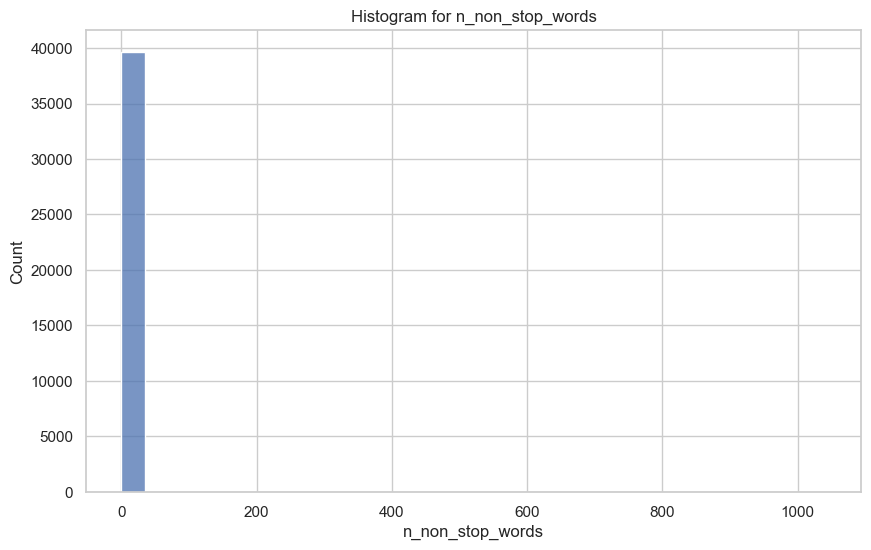

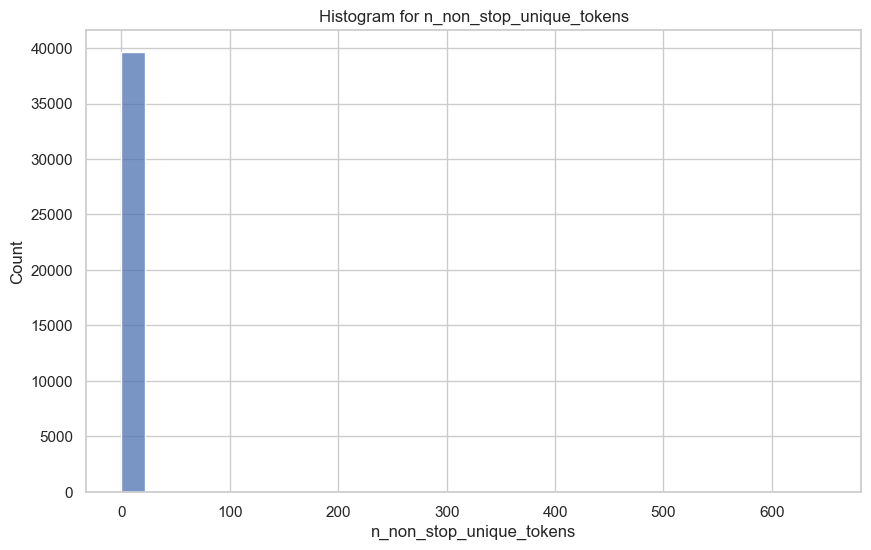

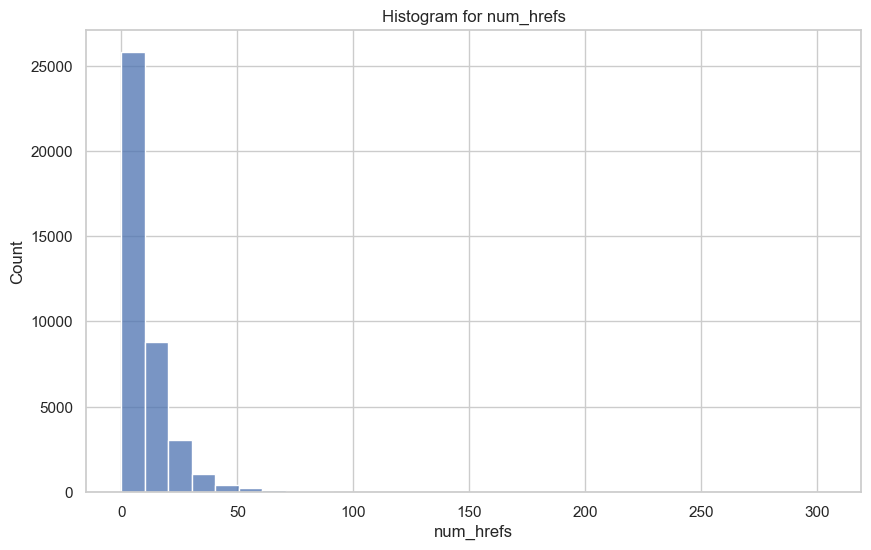

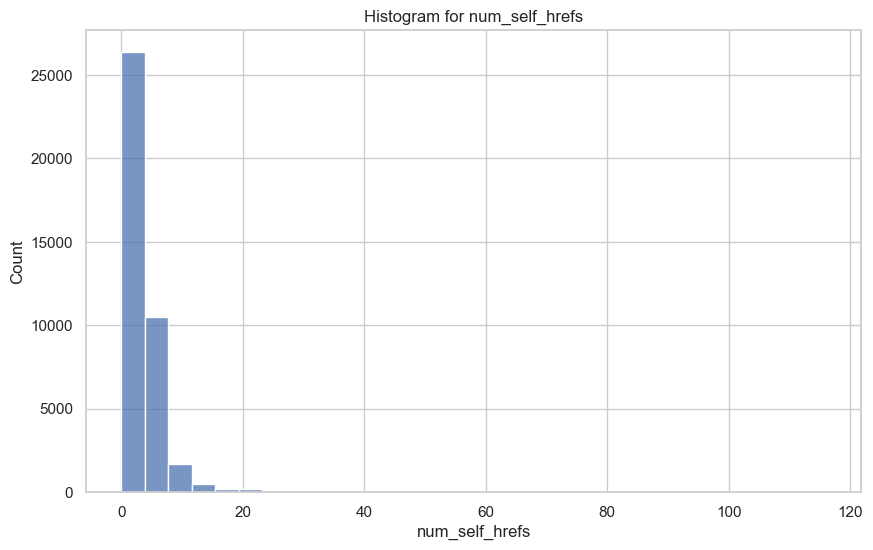

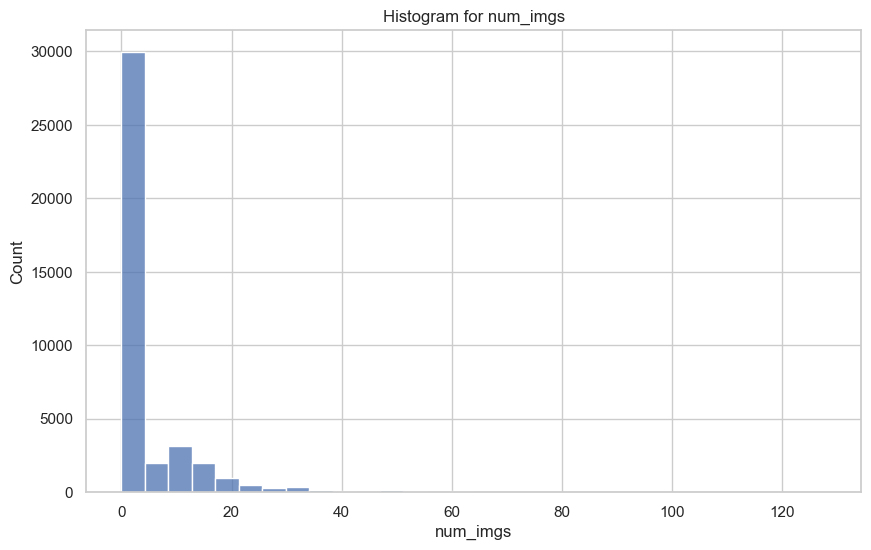

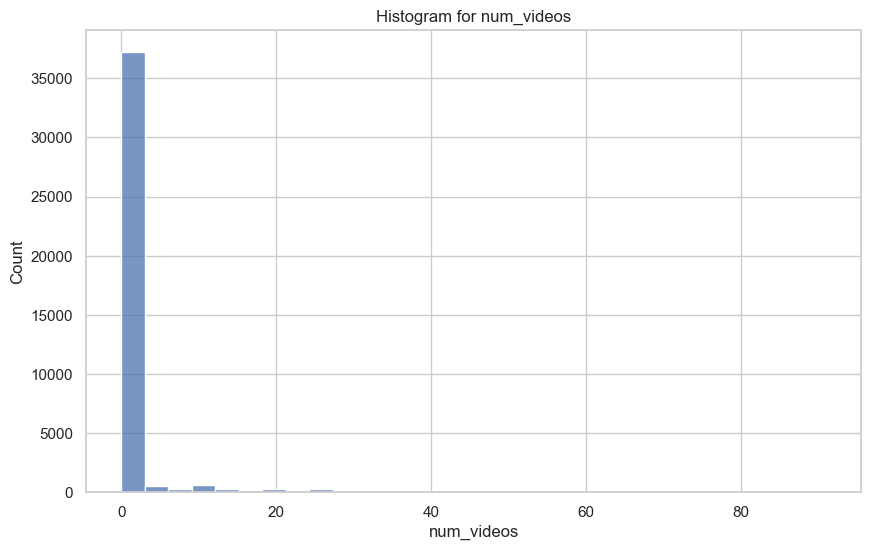

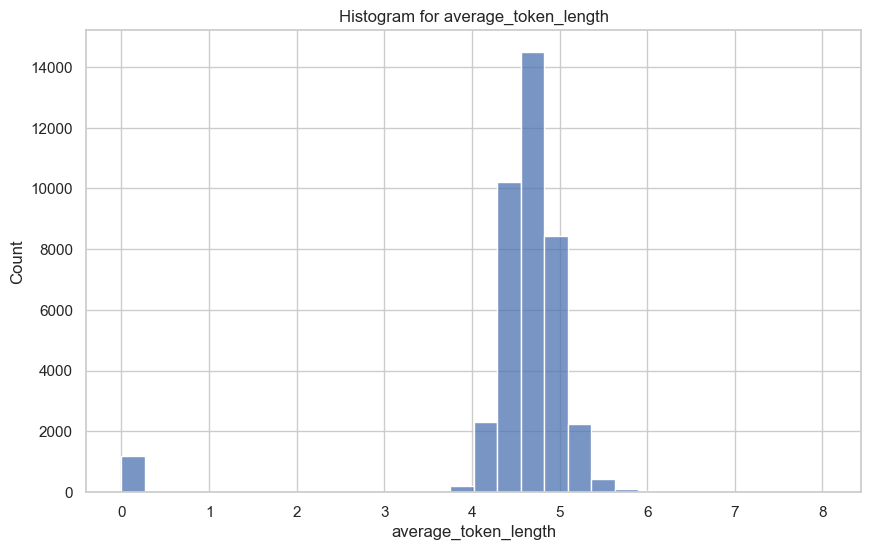

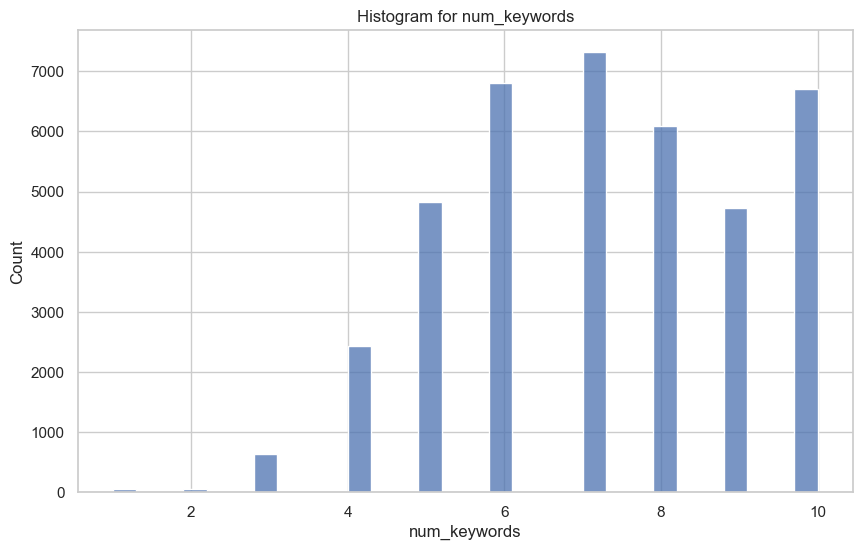

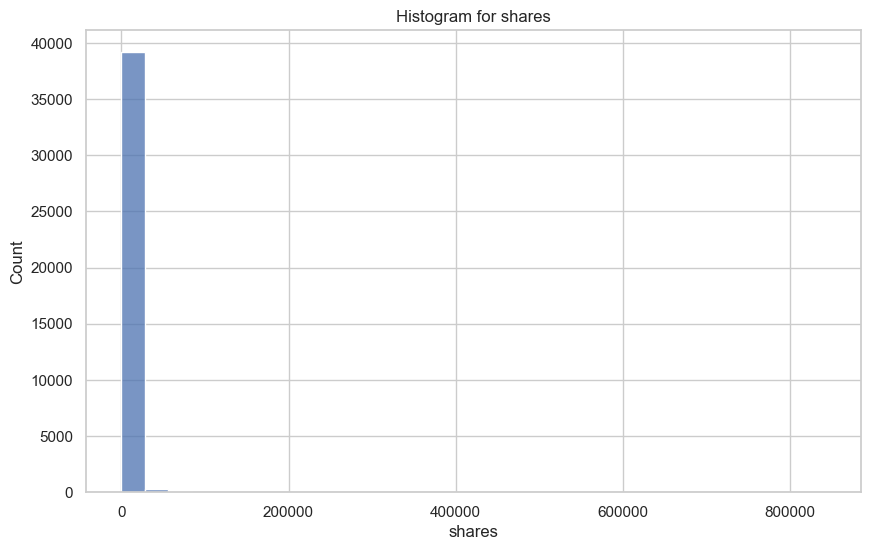

In [205]:
for i in group1:
  hist_plot(df,i)
  print("\n")

In [206]:
# drop the columns that are highly correlated:
df.drop(['n_unique_tokens',
 'n_non_stop_words'], axis = 1, inplace = True)

In [207]:
group1 = remove_col(df,group1)

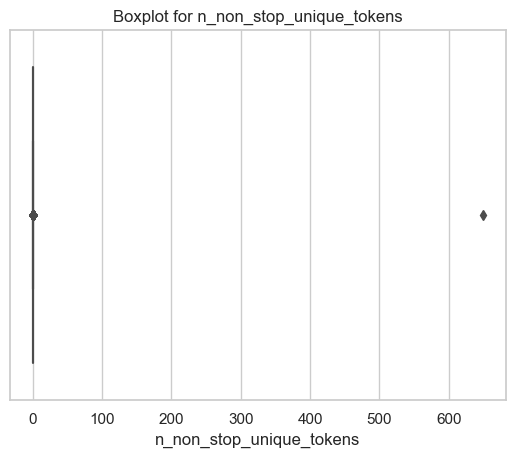

In [208]:
box_plot(df,  'n_non_stop_unique_tokens')

In the above boxplot all of the values are bettween 0 and 1 and there is one outlier for which the value is greater than 600, thus dropping one of the row wouldnt affect our analysis and training.

In [209]:
df[df['n_non_stop_unique_tokens'] > 600]

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,9.0,1570.0,650.0,11.0,10.0,51.0,0.0,4.696178,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


In [210]:
df = df[df['n_non_stop_unique_tokens'] < 600]

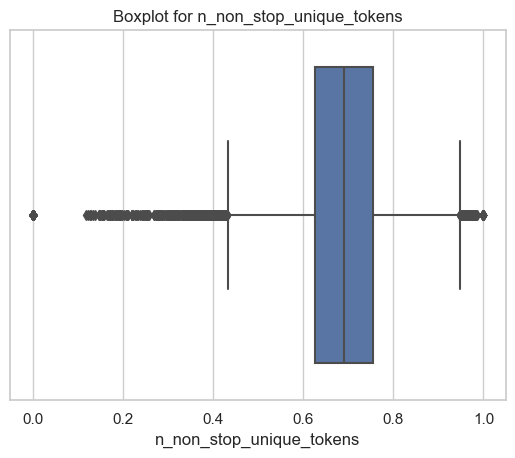

In [211]:
box_plot(df,  'n_non_stop_unique_tokens')

Once, we drop the outlier we could see drastic difference in the boxplot where we are able to visualize clearly that the entire value ranges between 0 and 1.

In [212]:
#Getting the statistics of the column after dropping the outlier
df['n_non_stop_unique_tokens'].describe()

count    39643.000000
mean         0.672796
std          0.154035
min          0.000000
25%          0.625733
50%          0.690476
75%          0.754624
max          1.000000
Name: n_non_stop_unique_tokens, dtype: float64

In [213]:
df[group1].describe()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,shares
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,10.398784,546.488914,0.672796,10.883687,3.293469,4.542971,1.249905,4.548236,7.223772,3395.317004
std,2.114052,471.085404,0.154035,11.332160,3.855043,8.306262,4.107902,0.844416,1.909154,11627.090592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,246.000000,0.625733,4.000000,1.000000,1.000000,0.000000,4.478403,6.000000,946.000000
50%,10.000000,409.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664078,7.000000,1400.000000
75%,12.000000,716.000000,0.754624,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,2800.000000
max,23.000000,8474.000000,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,843300.000000


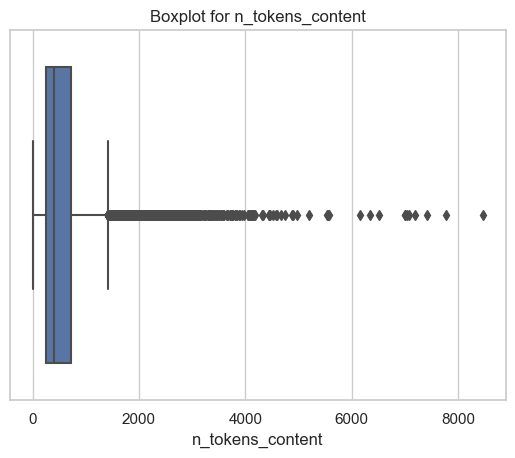

In [214]:
box_plot(df, 'n_tokens_content')

### Observations:
- The boxplot indicates that the majority of articles have a relatively low number of tokens, with most content being concise.
- Several articles exhibit a high token count, marking them as outliers. These outliers may represent longer articles that deviate significantly from the average content length.
- The interquartile range shows that 50% of the articles contain between approximately 0 and 2000 tokens, suggesting a concentration of shorter articles.

**Note: there are tokens whose value is 0 and this could happen when the article contain images/videos, we should look into the data and find out if that is the case.**


In [215]:
df[df['n_tokens_content'] == 0]

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,12.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,11.0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


In [216]:
df[df['n_tokens_content'] == 0].describe()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,1181.000000,1181.0,1181.0,1181.0,1181.0,1181.000000,1181.000000,1181.0,1181.000000,1181.000000,...,1181.0,1181.0,1181.0,1181.0,1181.0,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,10.930567,0.0,0.0,0.0,0.0,3.928027,0.796782,0.0,7.508891,0.018628,...,0.0,0.0,0.0,0.0,0.0,0.340320,0.085389,0.322671,0.193001,4698.751058
std,2.052759,0.0,0.0,0.0,0.0,8.736582,1.138401,0.0,1.627923,0.135266,...,0.0,0.0,0.0,0.0,0.0,0.340956,0.299209,0.193818,0.244013,12827.939697
min,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.144444,0.000000,1000.000000
50%,11.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,7.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.400000,0.111111,1600.000000
75%,12.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,9.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.566667,0.250000,0.500000,0.300000,3800.000000
max,17.000000,0.0,0.0,0.0,0.0,100.000000,24.000000,0.0,10.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.500000,1.000000,211600.000000


### Checking if there is any invalid data present and drop them

In [217]:
df[(df['n_tokens_content'] == 0) & ((df['num_imgs'] == 0 )& (df['num_videos'] == 0))]

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
917,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
1352,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33619,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.276136,-0.070076,0.223864,0.070076,704
37565,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,916
38746,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1300
39304,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,3700


In [218]:
outlier1 = df[(df['n_tokens_content'] == 0) & ((df['num_imgs'] == 0 )& (df['num_videos'] == 0))].index
df.drop(outlier1, axis = 0, inplace = True)
df = df.reset_index().iloc[:,1:]
df[(df['n_tokens_content'] == 0) & ((df['num_imgs'] == 0 )& (df['num_videos'] == 0))]

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


### Applying Log Scaling to Specific Features

In [219]:
for i in ['n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords']:
 t = i+"_log_scale"
 df[t]= log_scaling(df, i)
 group1.append(t)

In [220]:
df[group1].describe()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,shares,n_tokens_title_log_scale,n_tokens_content_log_scale,num_hrefs_log_scale,num_self_hrefs_log_scale,num_imgs_log_scale,num_videos_log_scale,average_token_length_log_scale,num_keywords_log_scale
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000
mean,10.400587,547.884781,0.674515,10.911487,3.301882,4.554575,1.253098,4.559853,7.222396,3396.627864,2.415909,5.904978,2.162064,1.211936,1.119207,0.401453,1.689671,2.077176
std,2.113977,470.875270,0.150427,11.333249,3.856363,8.313685,4.112659,0.813563,1.909104,11640.472889,0.190875,1.221191,0.803106,0.690862,0.973268,0.681059,0.287292,0.251285
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,9.000000,247.000000,0.626338,4.000000,1.000000,1.000000,0.000000,4.479769,6.000000,946.000000,2.302585,5.513429,1.609438,0.693147,0.693147,0.000000,1.701063,1.945910
50%,10.000000,410.000000,0.690789,8.000000,3.000000,1.000000,0.000000,4.665054,7.000000,1400.000000,2.397895,6.018593,2.197225,1.386294,0.693147,0.000000,1.734316,2.079442
75%,12.000000,717.000000,0.754951,14.000000,4.000000,4.000000,1.000000,4.855458,9.000000,2800.000000,2.564949,6.576470,2.708050,1.609438,1.609438,0.693147,1.767374,2.302585
max,23.000000,8474.000000,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,843300.000000,3.178054,9.044876,5.720312,4.762174,4.859812,4.521789,2.201829,2.397895


### Dropping Unscaled Columns and Cleaning `group1`

In [221]:
df.drop(['n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords'], axis = 1, inplace = True)

group1 = remove_col(df,group1)


### Group 2 Analysis:
This group categorizes articles based on their channel type (e.g., Lifestyle, Entertainment), helping to analyze how different content types perform in terms of shares.\
Here are the values of group2:

In [222]:
group2

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'shares']

In [223]:
df[group2].describe()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000
mean,0.052956,0.178114,0.158186,0.058571,0.185550,0.212711,3396.627864
std,0.223949,0.382614,0.364920,0.234822,0.388748,0.409230,11640.472889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000


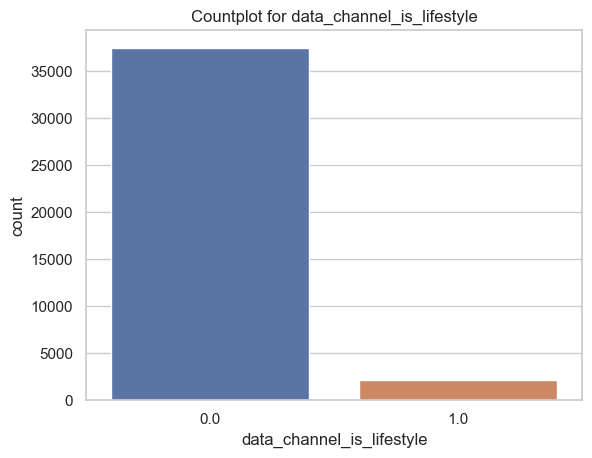

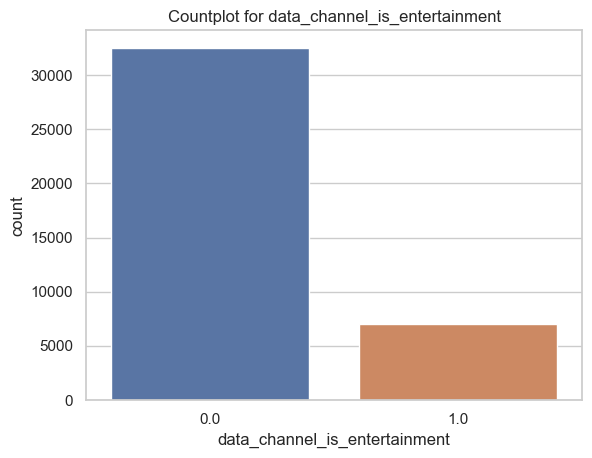

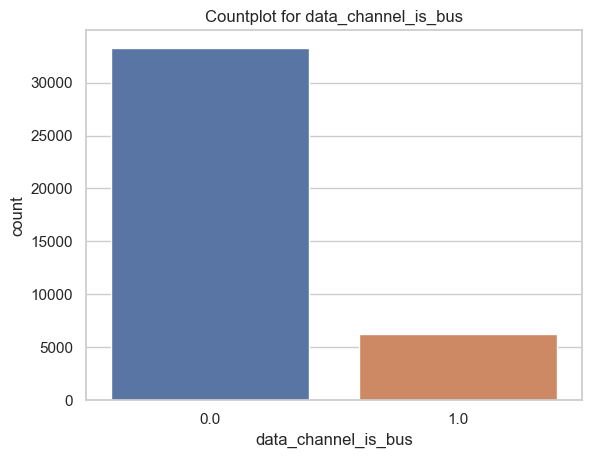

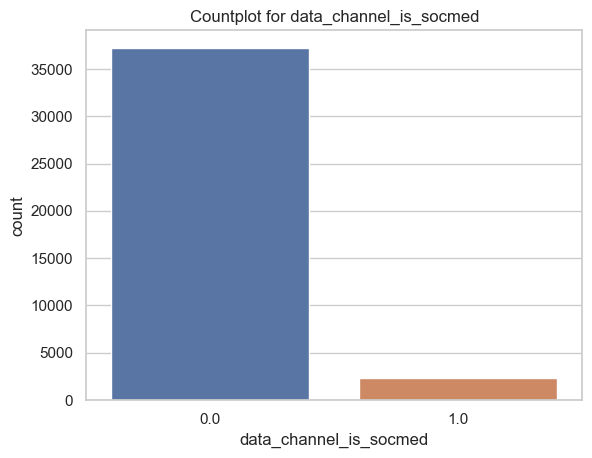

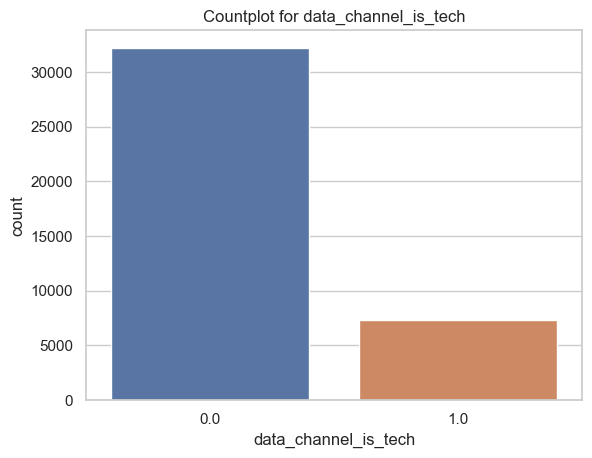

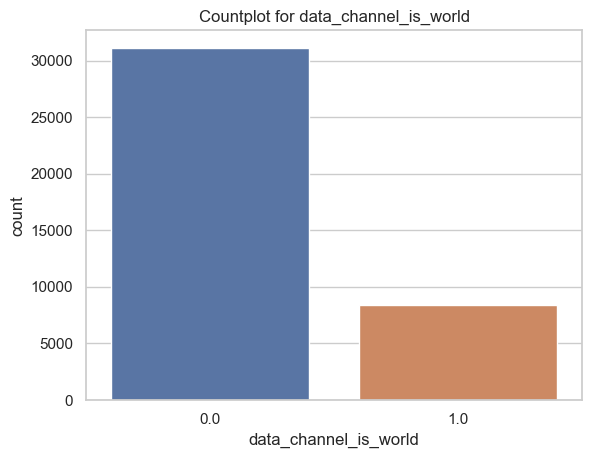

In [224]:
#Checking the distribution of data of each columns of group2
for i in group2[:-1]:
  print("\n")
  count_plot(df,i)

### Observations

- All data channels show significant imbalance, with far more articles not belonging to each channel (0.0) than belonging (1.0).

- World and Tech channels have the most articles, while Lifestyle and Social Media have the least.

- Lifestyle and Social Media channels show the highest imbalance, while World and Tech channels are relatively less imbalanced.


In [225]:
# check the data where data in columns ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
# 'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world'] are zero
df[(df['data_channel_is_lifestyle'] == 0) &
   (df['data_channel_is_entertainment'] == 0) &
   (df['data_channel_is_bus'] == 0) &
   (df['data_channel_is_socmed'] == 0) &
   (df['data_channel_is_tech'] == 0) &
   (df['data_channel_is_world'] == 0)].shape

(6086, 57)

These Columns are one hot encoded and doesnt require any sort of transformation, thus keeping the values unchanged.

### Group 3 Column Analysis:

This group evaluates the performance of keywords in relation to article shares, aiding in understanding which keywords drive engagement.\
These are the columns in group3.

In [226]:
group3

['kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'shares']

In [227]:
df[group3].describe()

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,shares
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000
mean,26.004502,1153.395617,312.217247,13613.228339,752639.337919,259421.057627,1116.914247,5657.845708,3135.507036,3396.627864
std,69.517140,3855.309025,621.000333,57907.703722,214219.822680,135089.028571,1137.424143,6102.395332,1318.837162,11640.472889
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,-1.000000,445.000000,141.605278,0.000000,843300.000000,172917.500000,0.000000,3562.101631,2382.052600,946.000000
50%,-1.000000,660.000000,235.428571,1400.000000,843300.000000,244673.015873,1023.679305,4353.463466,2869.103679,1400.000000
75%,4.000000,1000.000000,356.741071,7900.000000,843300.000000,331148.464285,2056.916429,6022.533165,3599.862348,2800.000000
max,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039819,298400.000000,43567.659946,843300.000000


### Observations

- Many columns, particularly those related to maximum values, exhibit a skewed distribution to the right, indicating a concentration of values on the lower end with a few larger outliers.
- The "kw_min_min", "kw_min_avg", and "kw_min_avg" columns contain negative values.
- The "kw_min_min" column has a high frequency of -1 values. 

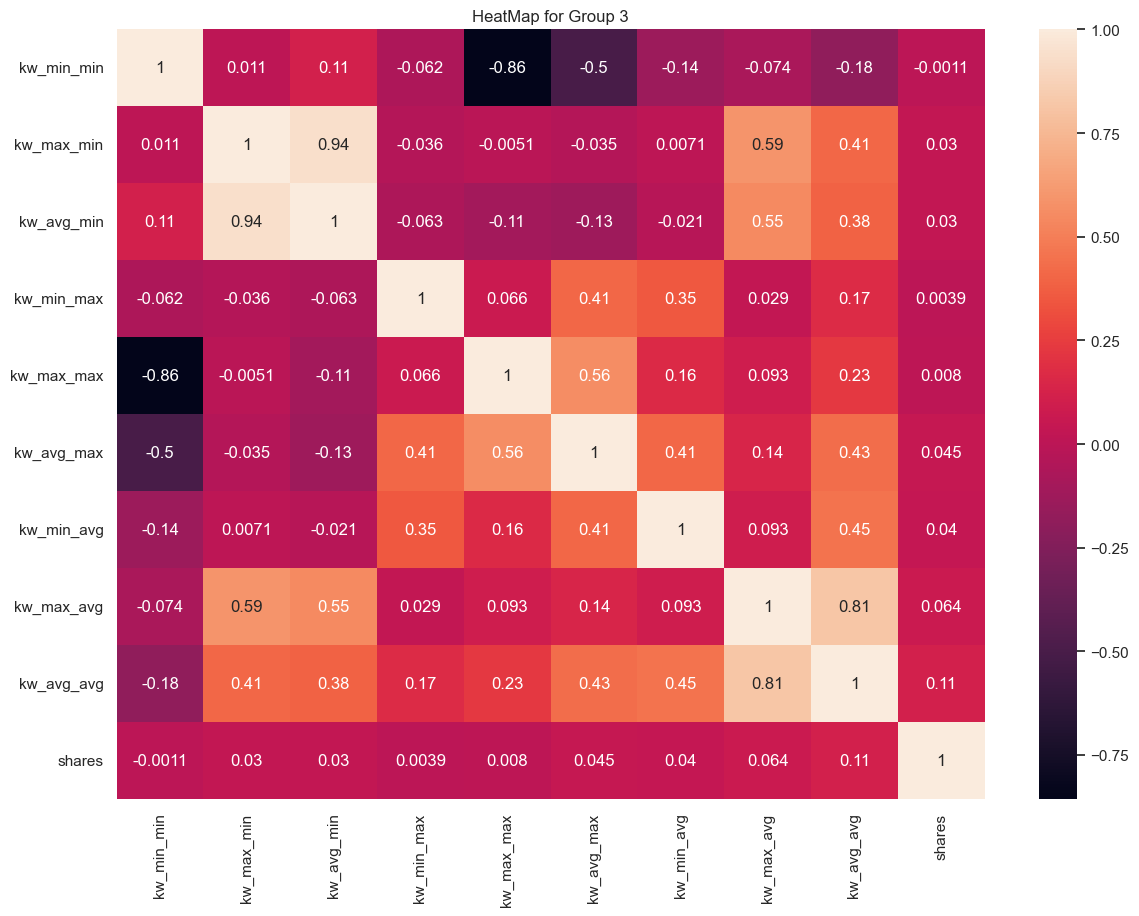

In [228]:
heat_map(df[group3], 'Group 3')

**Highly Correlated Columns:**

* **kw_max_min** and **kw_avg_min:** These two columns have a strong positive correlation of 0.94, indicating that they are highly correlated.
* **kw_min_min** and **kw_max_max:** These two columns have a strong negative correlation of -0.86, indicating an inverse relationship. 

Dropping kw_max_min and kw_min_min for the above stated reason.

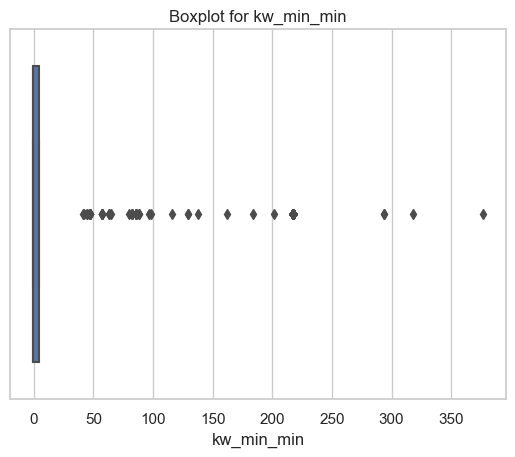

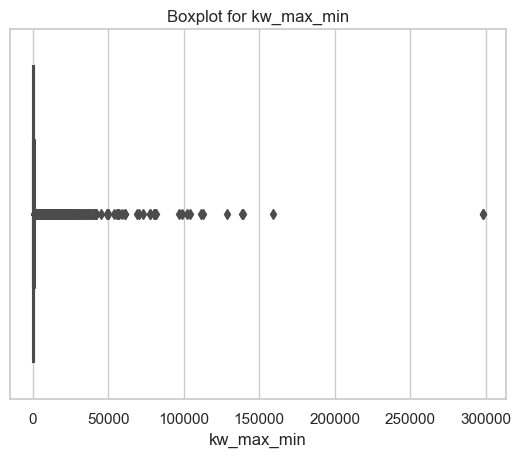

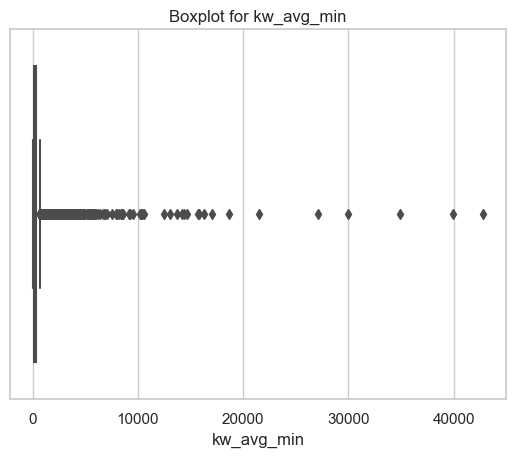

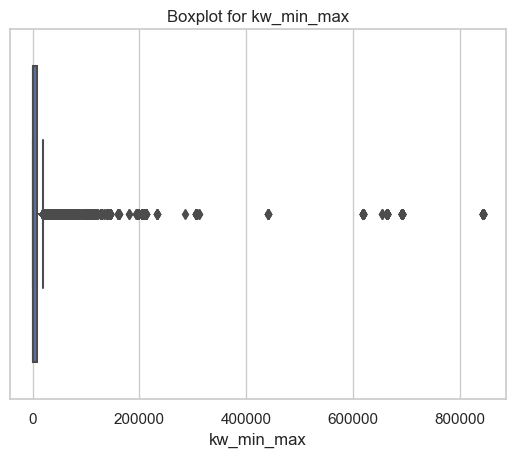

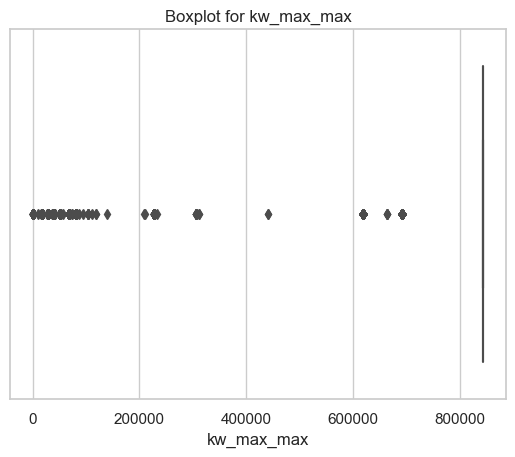

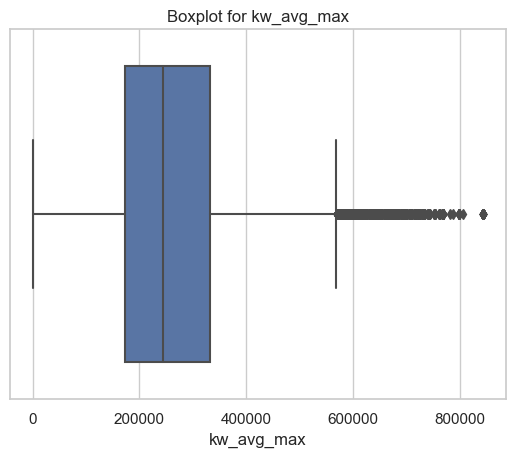

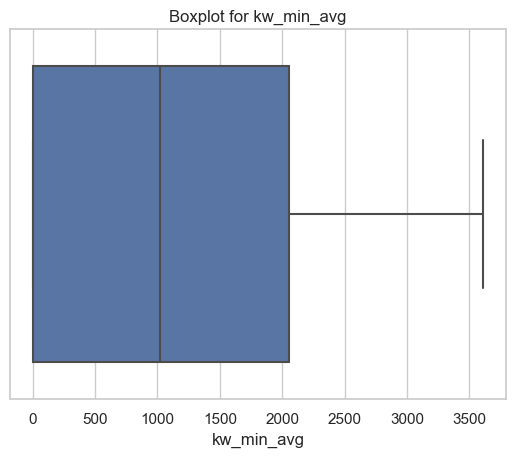

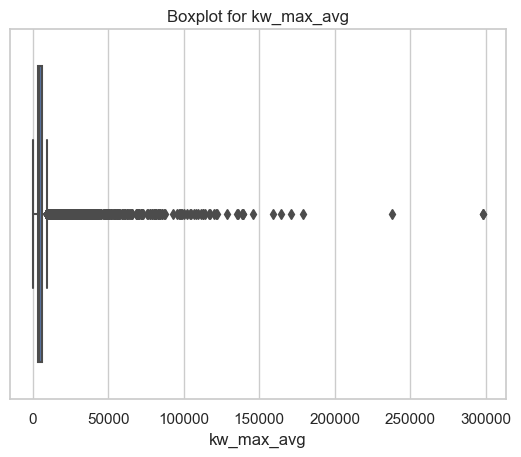

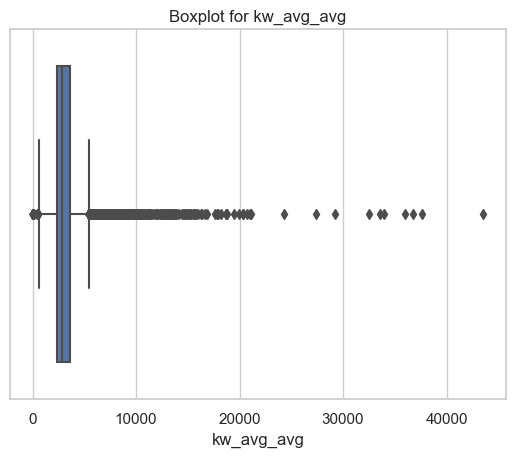

In [229]:
for i in group3[:-1]:
  box_plot(df,i)
  print("\n")

**Highly correlated columns:**

'kw_max_min','kw_avg_min' = 0.94 \
kw_min_min', 'kw_max_max' = -0.86


In [230]:
# drop columns kw_min_min','kw_max_min'
df.drop(['kw_min_min','kw_max_min'], axis = 1, inplace = True)

In [231]:
group3 = remove_col(df,group3)

### We are scaling the data as they are widely spread which helps in improvin the model performance.

In [232]:
from sklearn.preprocessing import StandardScaler
g3_scaler = StandardScaler()
df_scaled_g3 = g3_scaler.fit_transform(df[['kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg']])

df_scaled_g3 = pd.DataFrame(df_scaled_g3, columns = ['kw_avg_min_std',
 'kw_min_max_std',
 'kw_max_max_std',
 'kw_avg_max_std',
 'kw_min_avg_std',
 'kw_max_avg_std',
 'kw_avg_avg_std'])

scaled_columns = df_scaled_g3.columns
group3.extend(scaled_columns)

In [233]:
df = pd.concat([df, df_scaled_g3], axis=1)
df[group3].describe()

,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,shares,kw_avg_min_std,kw_min_max_std,kw_max_max_std,kw_avg_max_std,kw_min_avg_std,kw_max_avg_std,kw_avg_avg_std
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,3.954200e+04,3.954200e+04,3.954200e+04,3.954200e+04,3.954200e+04,39542.000000,3.954200e+04
mean,312.217247,13613.228339,752639.337919,259421.057627,1116.914247,5657.845708,3135.507036,3396.627864,-1.265040e-16,-1.725054e-17,-1.610051e-16,2.875091e-16,-5.175163e-17,0.000000,-7.331481e-17
std,621.000333,57907.703722,214219.822680,135089.028571,1137.424143,6102.395332,1318.837162,11640.472889,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00
min,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,-5.043817e-01,-2.350879e-01,-3.513442e+00,-1.920395e+00,-9.828597e-01,-0.927163,-2.377509e+00
25%,141.605278,0.000000,843300.000000,172917.500000,0.000000,3562.101631,2382.052600,946.000000,-2.747408e-01,-2.350879e-01,4.232186e-01,-6.403529e-01,-9.819805e-01,-0.343434,-5.713093e-01
50%,235.428571,1400.000000,843300.000000,244673.015873,1023.679305,4353.463466,2869.103679,1400.000000,-1.236548e-01,-2.109112e-01,4.232186e-01,-1.091741e-01,-8.197129e-02,-0.213752,-2.020012e-01
75%,356.741071,7900.000000,843300.000000,331148.464285,2056.916429,6022.533165,3599.862348,2800.000000,7.169785e-02,-9.866219e-02,4.232186e-01,5.309707e-01,8.264411e-01,0.059762,3.520990e-01
max,42827.857143,843300.000000,843300.000000,843300.000000,3613.039819,298400.000000,43567.659946,843300.000000,6.846402e+01,1.432793e+01,4.232186e-01,4.322234e+00,2.194570e+00,47.972286,3.065781e+01


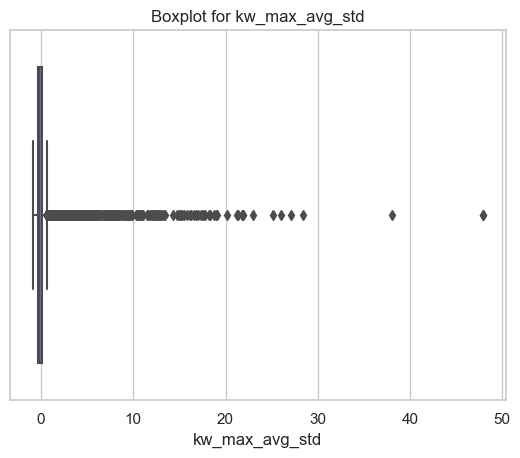

In [234]:
box_plot(df, 'kw_max_avg_std')

The boxplot for kw_max_avg_std indicates that after applying the standard scaler, the values are symmetrically distributed around a mean of 0. However, the data is still heavily skewed toward the lower values, indicating the presence of outliers far from the central tendency

In [235]:
df[df['kw_max_avg_std']>30].index

Index([5640, 16198, 16211], dtype='int64')

In [236]:
#dropping the values above 30
drop_index_g3 =  df[df['kw_max_avg_std']>30].index
df.drop(drop_index_g3, axis = 0, inplace = True)
df[group3].describe()

,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,shares,kw_avg_min_std,kw_min_max_std,kw_max_max_std,kw_avg_max_std,kw_min_avg_std,kw_max_avg_std,kw_avg_avg_std
count,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000
mean,310.354577,13614.076608,752636.326159,259411.811601,1116.927938,5637.162506,3132.866239,3396.082450,-0.003000,0.000015,-0.000014,-0.000068,0.000012,-0.003389,-0.002002
std,563.631999,57909.815714,214226.750551,135086.130010,1137.450335,5616.200616,1283.048058,11640.575868,0.907631,1.000049,1.000045,0.999991,1.000036,0.920339,0.972875
min,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,-0.504382,-0.235088,-3.513442,-1.920395,-0.982860,-0.927163,-2.377509
25%,141.600000,0.000000,843300.000000,172915.476191,0.000000,3562.101631,2382.026894,946.000000,-0.274749,-0.235088,0.423219,-0.640368,-0.981981,-0.343434,-0.571329
50%,235.400000,1400.000000,843300.000000,244657.142857,1023.666667,4353.215190,2868.872302,1400.000000,-0.123701,-0.210911,0.423219,-0.109292,-0.081982,-0.213793,-0.202177
75%,356.690476,7900.000000,843300.000000,331142.857143,2056.992063,6022.051789,3599.711160,2800.000000,0.071616,-0.098662,0.423219,0.530929,0.826508,0.059683,0.351984
max,39979.000000,843300.000000,843300.000000,843300.000000,3613.039819,178675.000000,37607.521654,843300.000000,63.876430,14.327925,0.423219,4.322234,2.194570,28.352693,26.138519


In [237]:
#dropping unscaled columns
df.drop(['kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg'], axis = 1, inplace = True)
group3 = remove_col(df,group3)


### Group 4 Column Analysis:

These variables focus on how references to other articles impact shares, allowing for analysis of inter-article relationships. Below are the columns of group4.

In [238]:
group4

['self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'shares']

In [239]:
df[group4].describe()

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,shares
count,39539.000000,39539.000000,39539.000000,39539.000000
mean,4009.098103,10331.429899,6412.613352,3396.082450
std,19763.798007,40910.395817,24228.613557,11640.575868
min,0.000000,0.000000,0.000000,1.000000
25%,643.000000,1100.000000,989.250000,946.000000
50%,1200.000000,2900.000000,2200.000000,1400.000000
75%,2700.000000,8000.000000,5200.000000,2800.000000
max,843300.000000,843300.000000,843300.000000,843300.000000


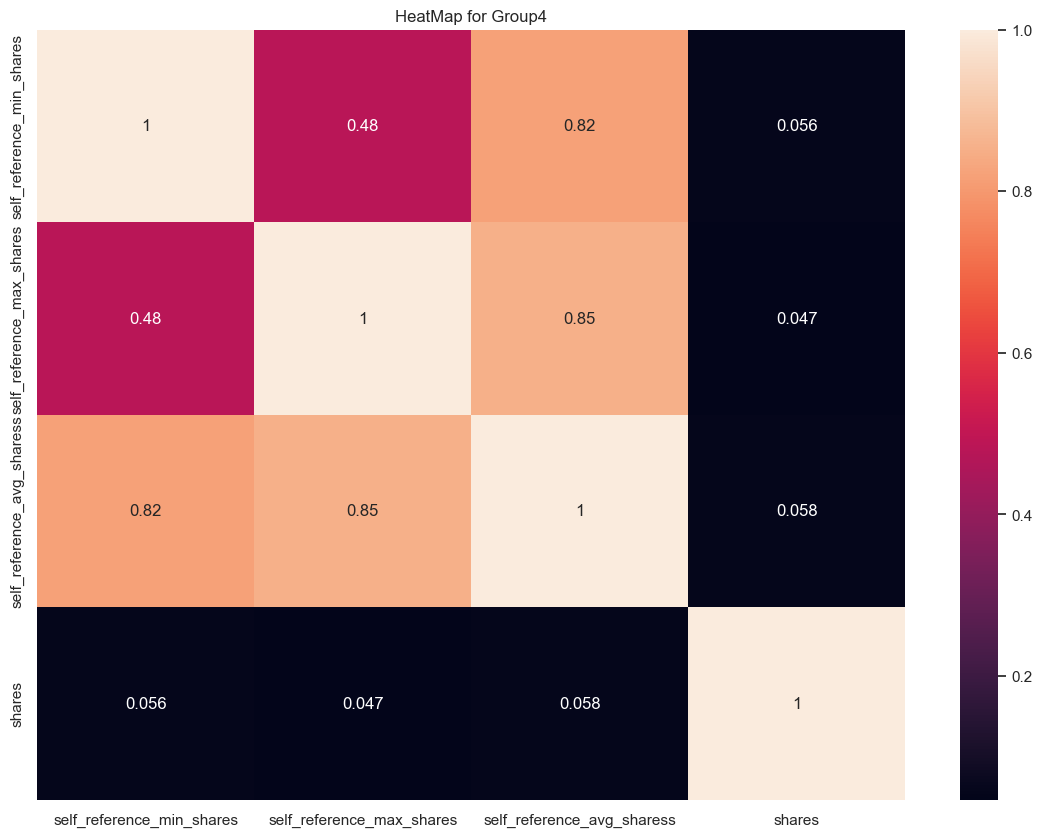

In [240]:
heat_map(df[group4],'Group4')

### Key Observations

1. **High Correlation Between Self-Reference Variables:**
   - There is a strong correlation between the three self-reference variables:
     - `self_reference_min_shares` and `self_reference_avg_sharess` have a correlation of **0.82**.
     - `self_reference_max_shares` and `self_reference_avg_sharess` show a correlation of **0.85**.
   
2. **Low Correlation with `shares`:**
   - All three self-reference columns have **low correlation values** with the `shares` column:
     - `self_reference_min_shares` and `shares`: **0.056**
     - `self_reference_max_shares` and `shares`: **0.047**
     - `self_reference_avg_sharess` and `shares`: **0.058**

As  `self_reference_min_shares` and `self_reference_avg_sharess` are highly corrleated we will be dropping these columns

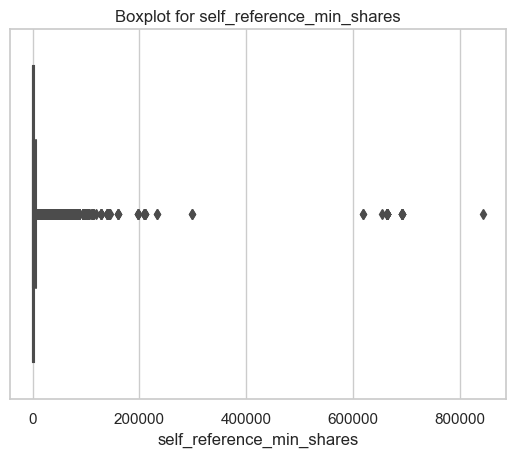

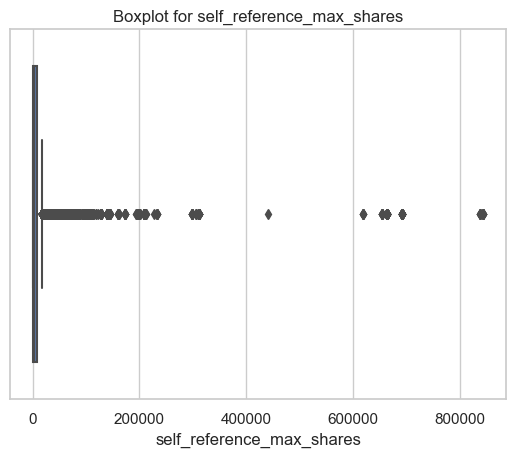

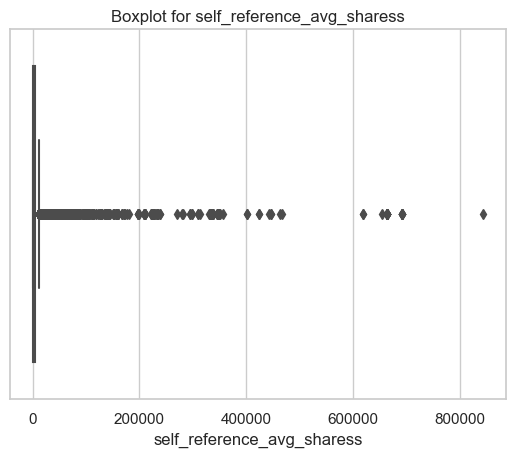

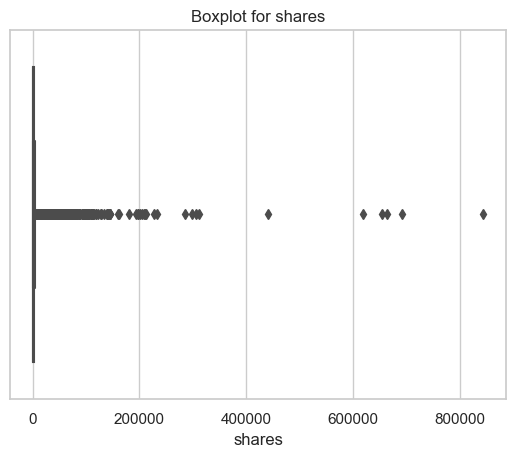

In [241]:
for i in group4:
  box_plot(df,i)
  print('\n')

In [242]:
group4

['self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'shares']

In [243]:
# drop columns 'self_reference_min_shares', 'self_reference_max_shares',
df.drop(['self_reference_min_shares', 'self_reference_max_shares'], axis = 1, inplace = True)
group4 = remove_col(df,group4)

### Apply log scale and remove the unscaled columns

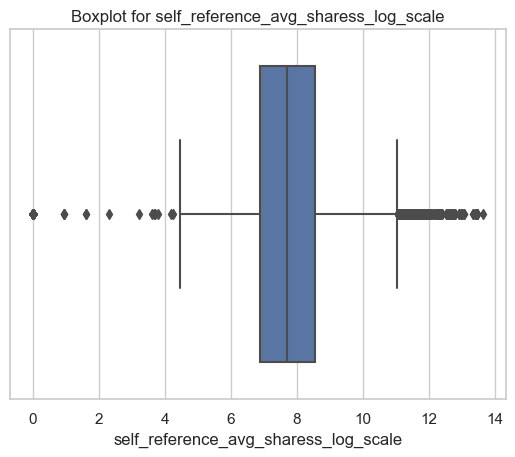

In [244]:
df['self_reference_avg_sharess_log_scale']= log_scaling(df, 'self_reference_avg_sharess')
group4.append('self_reference_avg_sharess_log_scale')
box_plot(df, 'self_reference_avg_sharess_log_scale')

In [245]:
df.drop(['self_reference_avg_sharess'], axis = 1, inplace = True)
group4 = remove_col(df,group4)

### Group 5 Analaysis:
This group analyzes how the day of the week or weekend affects article shares, providing insights into optimal publishing times.

In [246]:
group5

['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'shares']

In [247]:
df[group5].describe()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
count,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000
mean,0.168138,0.186474,0.187511,0.183490,0.143909,0.061307,0.069172,0.130479,3396.082450
std,0.373993,0.389494,0.390326,0.387072,0.351001,0.239895,0.253750,0.336834,11640.575868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000


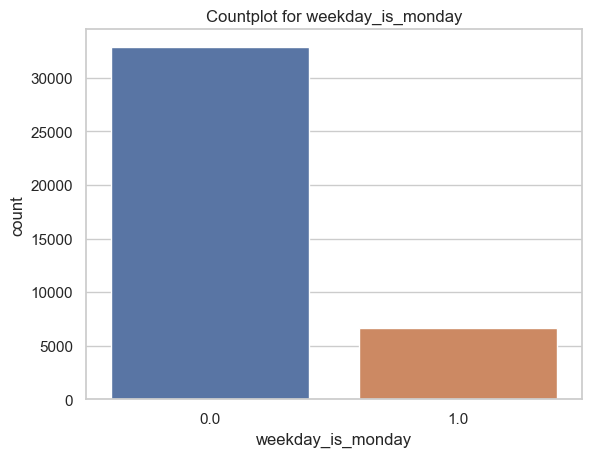

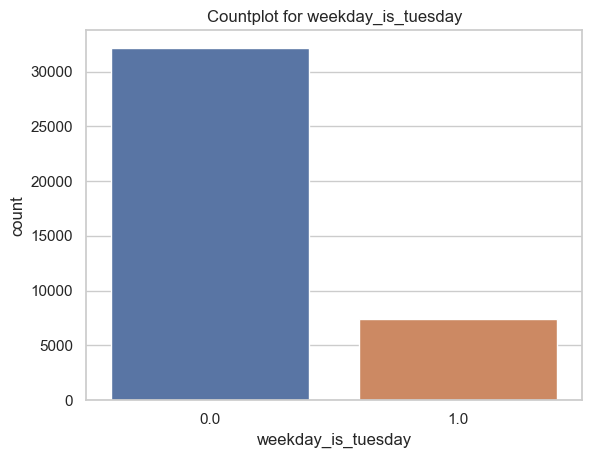

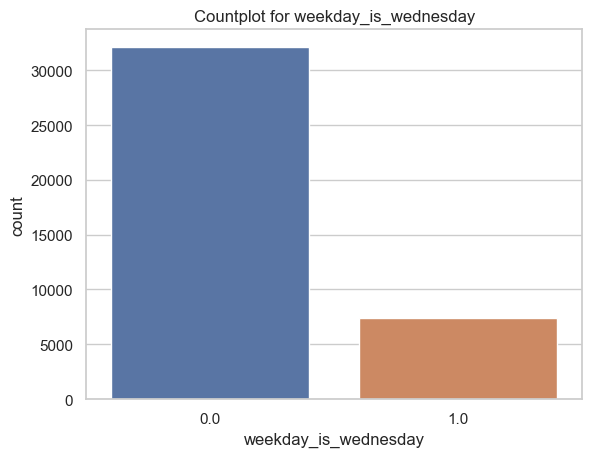

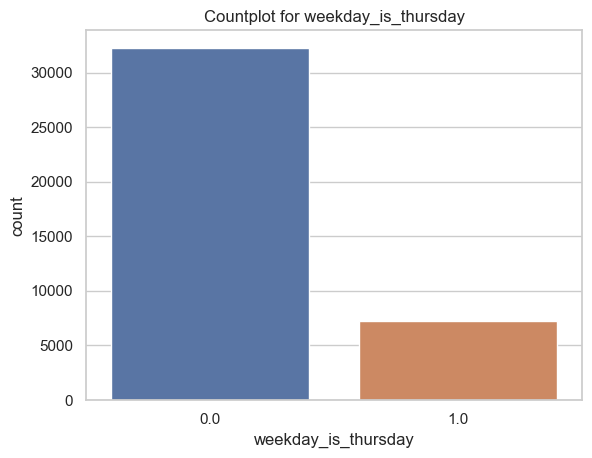

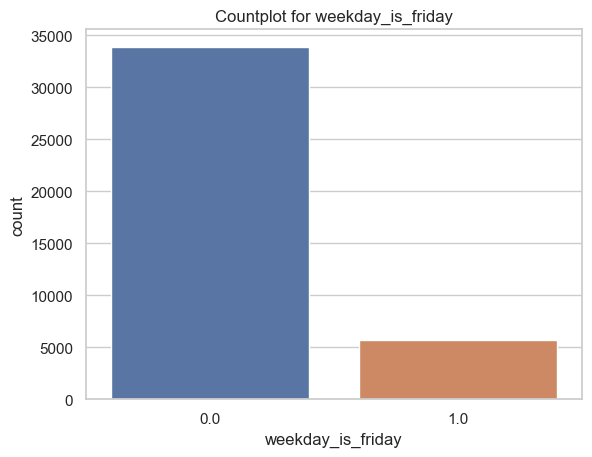

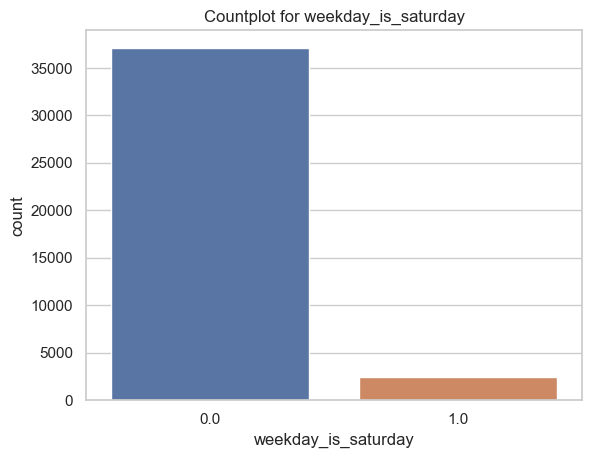

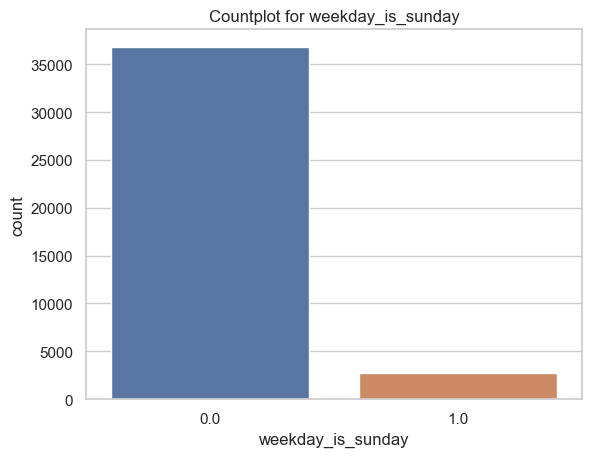

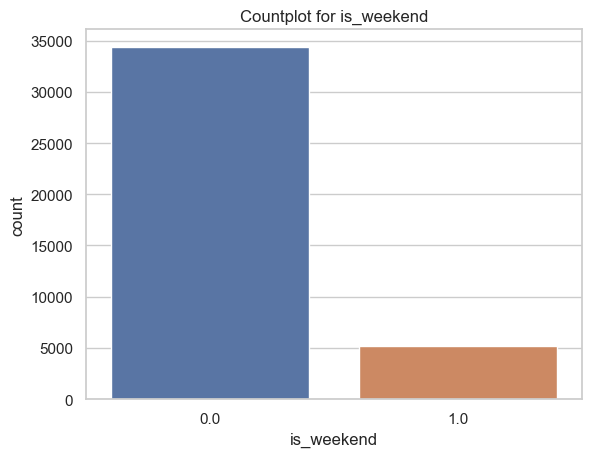

In [248]:
for i in group5[:-1]:
  print("\n")
  count_plot(df,i)

**As all the columns are categorical we have ploted count plot to understand the distribution of the data. From this we understand that we can derive weekday_is_sunday','is_weekend' from the rest of the columns. we will be drpopping them**

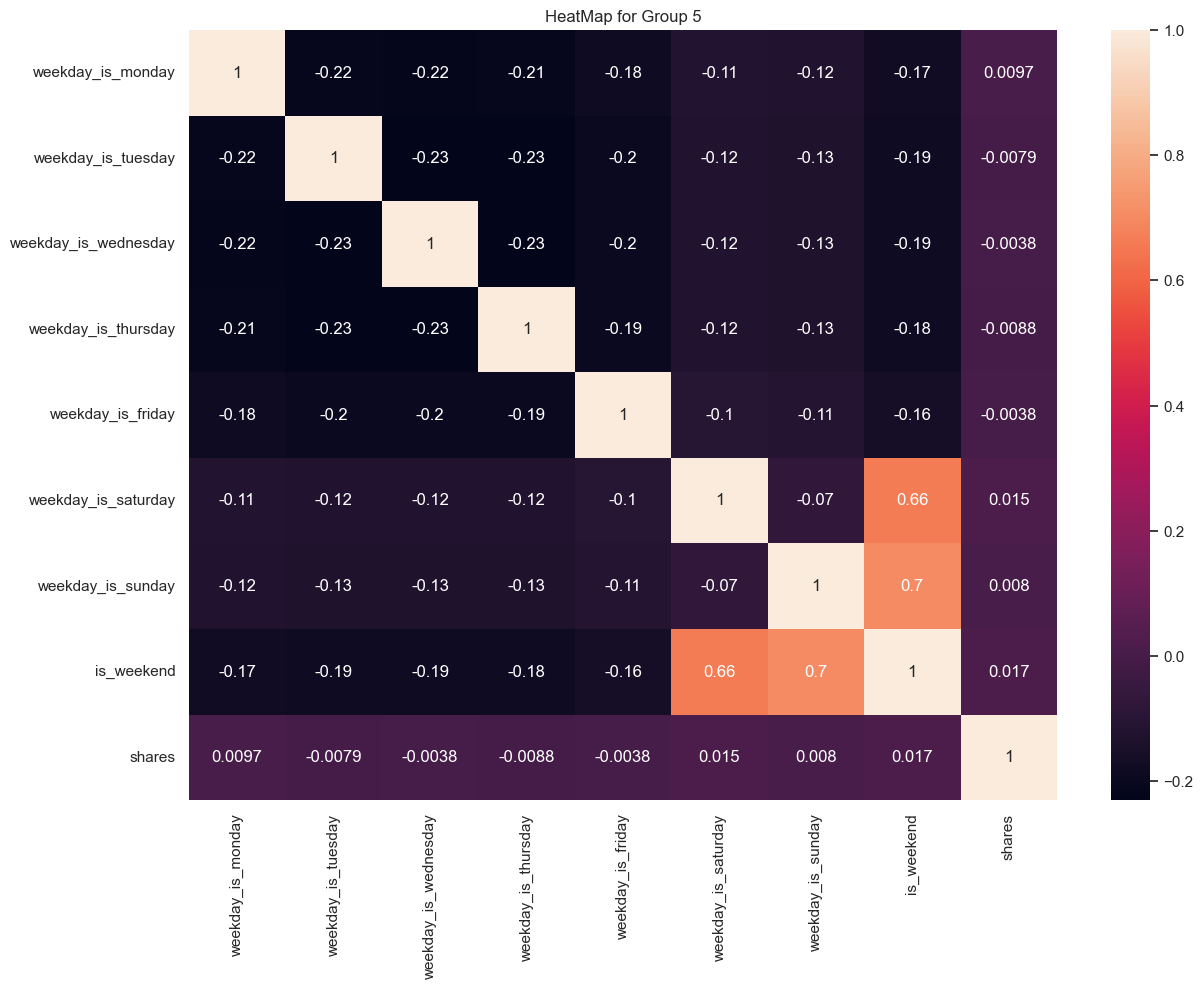

In [249]:
heat_map(df[group5], 'Group 5')

### We understand that we can derive weekday_is_sunday','is_weekend' from the rest of the columns and these cokumns are highly correleated. we will be drpopping them.

In [250]:
df.drop(['weekday_is_sunday','is_weekend'], axis = 1, inplace = True)
df_reduced = remove_col(df,group5)

### Group 6 Analysis
These variables represent closeness to different topics derived from Latent Dirichlet Allocation (LDA), helping to assess the thematic relevance of articles in relation to shares.

In [251]:
group6

['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']

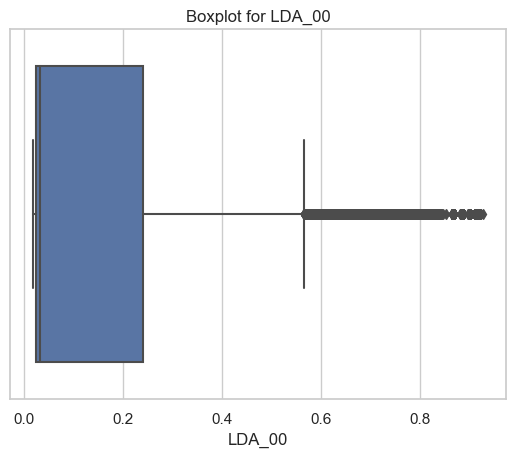

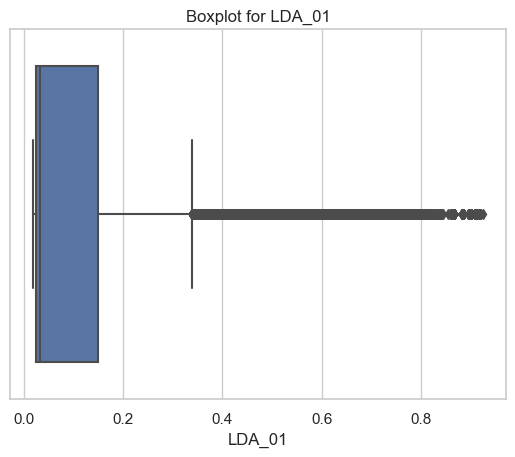

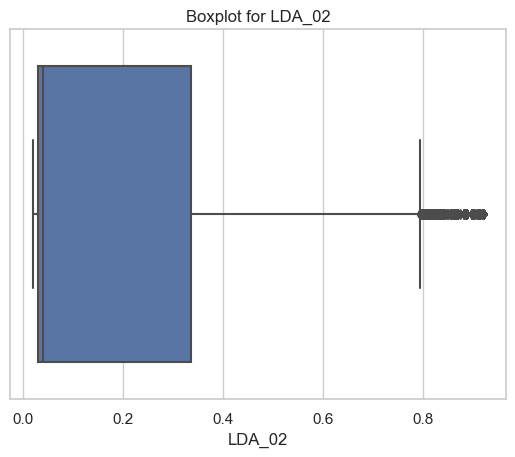

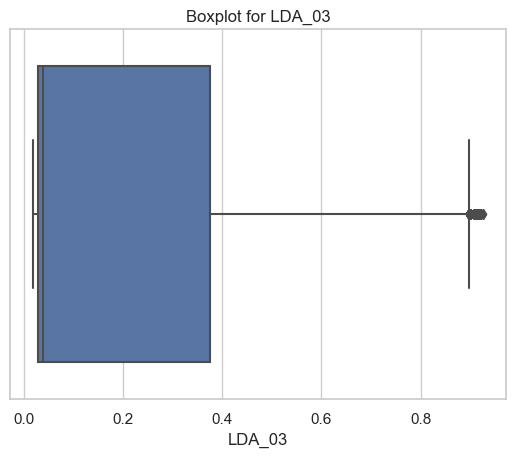

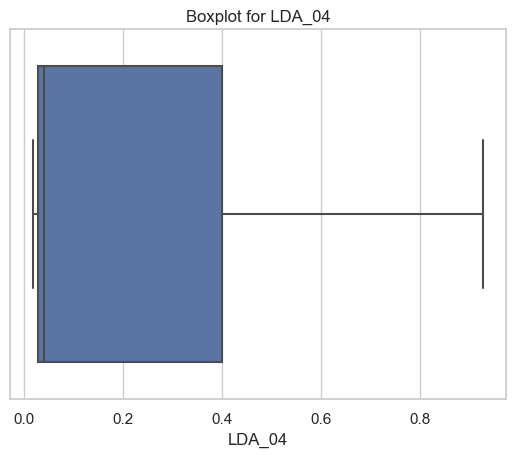

In [252]:
for i in group6[:-1]:
  box_plot(df,i)
  print("\n")

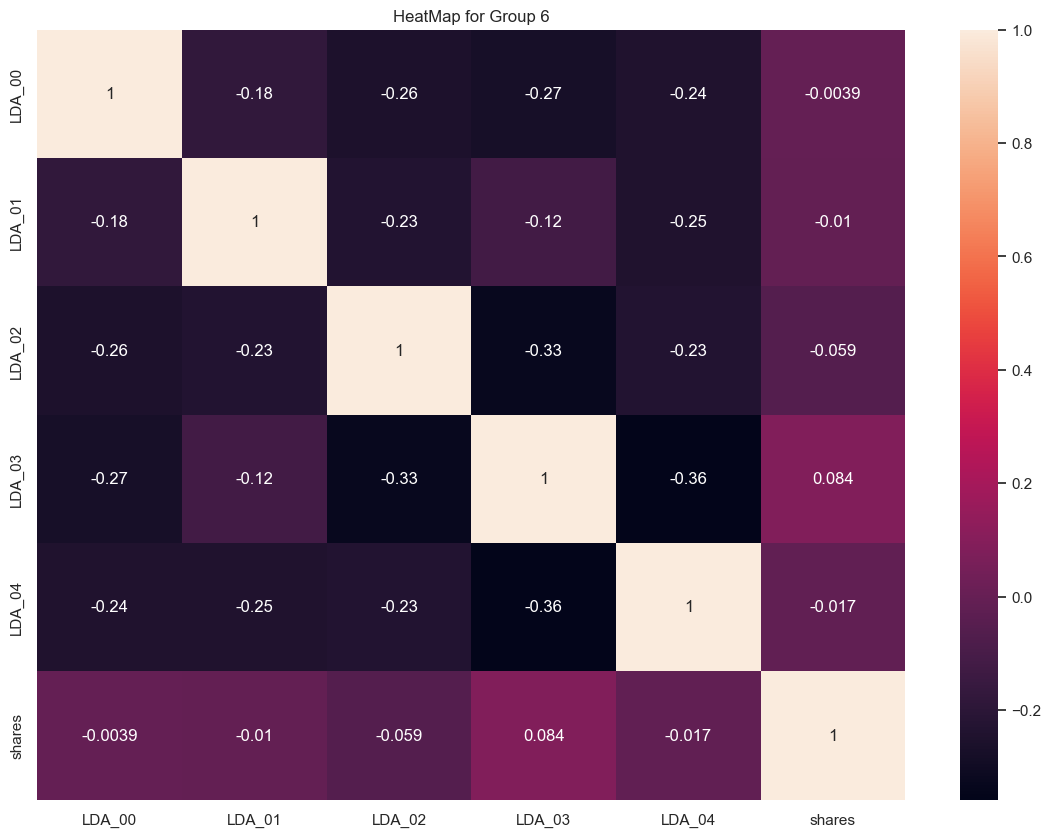

In [253]:
heat_map(df[group6], 'Group 6')

### Observations:

- The boxplot indicates that the data spread is between 0 and 1, and the data does not require any outlier treatment.
- Although there are a few outliers at the higher end, these data points won't significantly affect the target variable, considering the correlation between these variables and the shares variable.
- The heat map indicates that there is no high correlation between the independent variables of Group 4, nor with the target variable.


### Group 7 Analysis
This comprehensive group examines sentiment and subjectivity metrics, allowing for deeper analysis of how the emotional tone of articles correlates with engagement.

In [254]:
group7

['global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

In [255]:
df[group7].describe()

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000
mean,0.444514,0.119619,0.039727,0.016655,0.683911,0.288673,0.354739,0.095693,0.758688,-0.260187,-0.523279,-0.107778,0.282056,0.071245,0.342172,0.155933,3396.082450
std,0.114643,0.096869,0.017335,0.010809,0.187272,0.155675,0.103122,0.071244,0.245108,0.127210,0.289456,0.095343,0.324310,0.265438,0.188661,0.226313,11640.575868
min,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,0.396776,0.058273,0.028481,0.009669,0.600000,0.187500,0.306667,0.050000,0.600000,-0.328704,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,0.453704,0.119444,0.039062,0.015385,0.711111,0.280000,0.359056,0.100000,0.800000,-0.253670,-0.500000,-0.100000,0.142857,0.000000,0.500000,0.000000,1400.000000
75%,0.508464,0.177995,0.050321,0.021739,0.800000,0.384615,0.411650,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.144444,0.500000,0.250000,2800.000000
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Observation
From the above statistical table, we identified that most of the data is spread between 0 and 1. For some variables, like abs_title_subjectivity, the data is spread between 0 and 0.5. The negative polarity columns have data spread between -1 and 0, while for title_sentiment_polarity, the data is spread between -1 and 1.

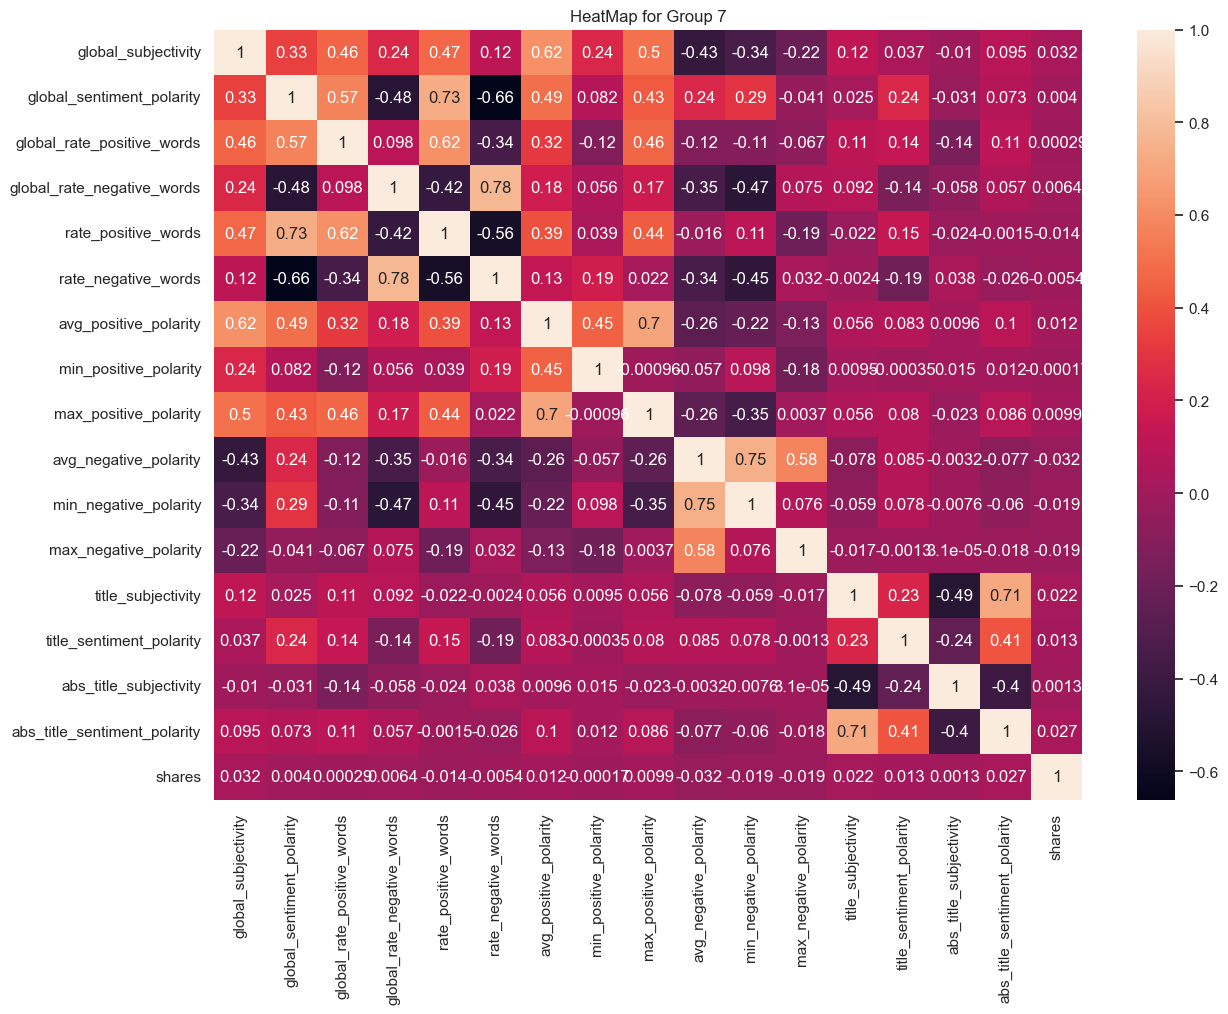

In [256]:
heat_map(df[group7], 'Group 7')

The analysis of the heatmap reveals significant interrelationships among various sentiment-related variables. Notably, **Global Subjectivity** exhibits strong positive correlations with **Global Sentiment Polarity** (0.33), **Rate of Positive Words** (0.47), and **Average Positive Polarity** (0.62), suggesting that more subjective content is typically more positive. Similarly, **Global Sentiment Polarity** correlates strongly with **Global Rate of Positive Words** (0.73) and is negatively correlated with **Rate of Negative Words** (-0.66), indicating that a positive sentiment tends to correlate with reduced negative word usage.

However, the analysis also highlights a weak correlation between shares and most sentiment variables, with the highest correlation being with **Global Sentiment Polarity** (0.073) and **Global Rate of Positive Words** (0.11). This indicates that factors such as **Global Subjectivity**, **Global Sentiment Polarity**, and **Rate of Positive Words** significantly influence the overall tone and positivity of the content, while the number of shares may be influenced more by external factors beyond the sentiment metrics.


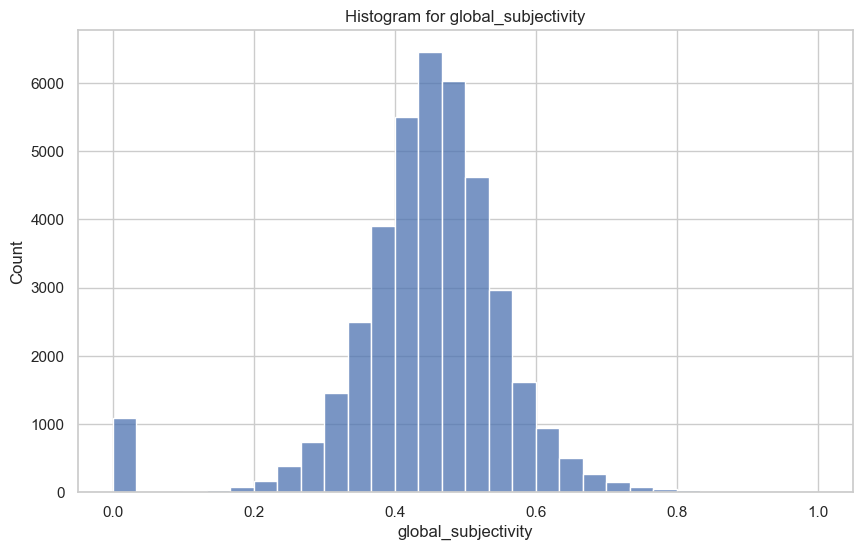

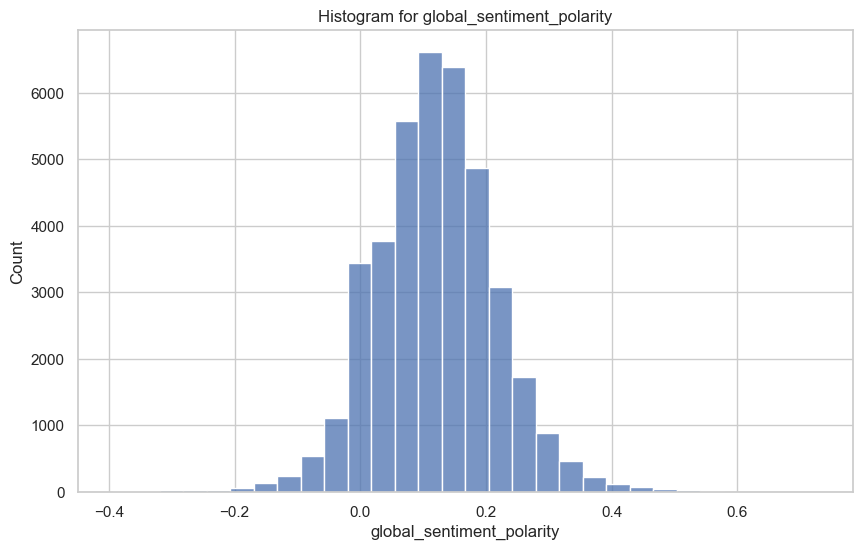

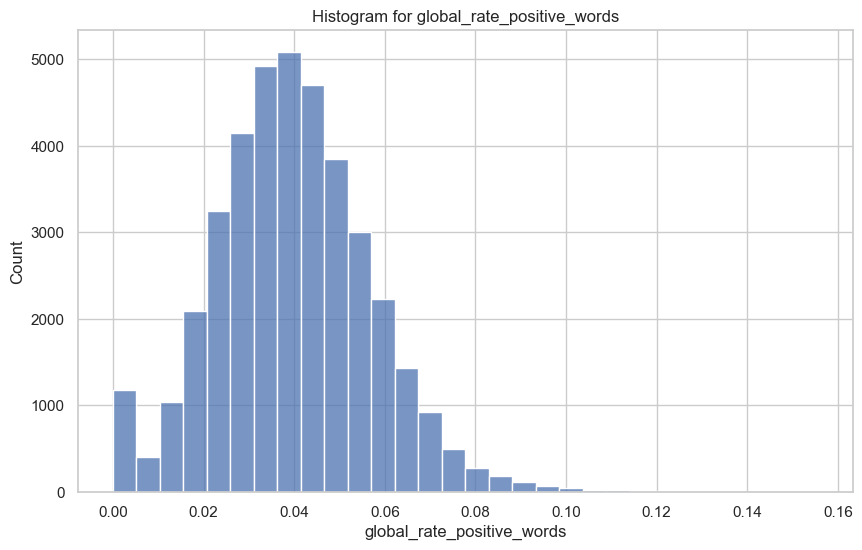

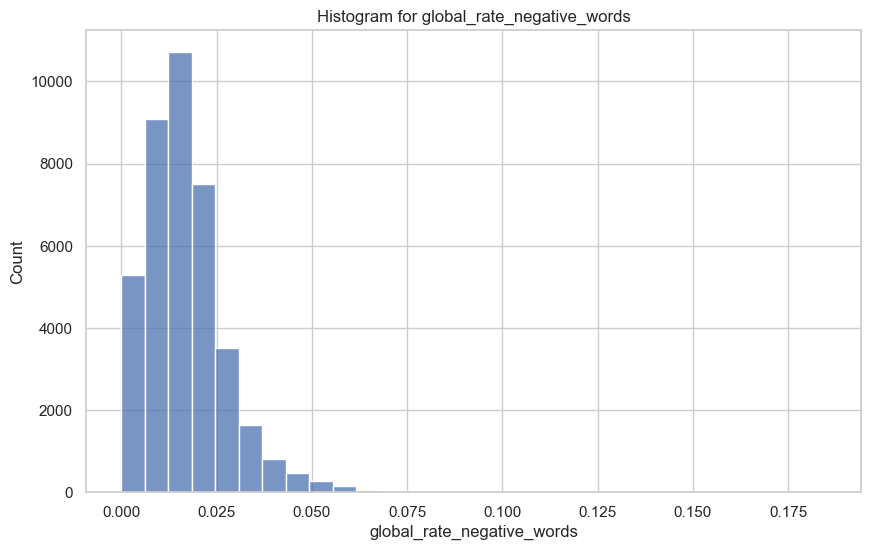

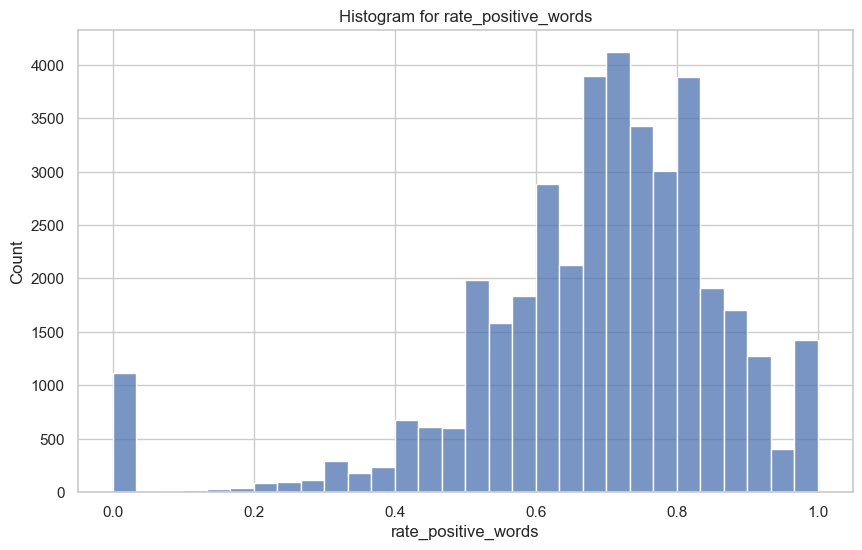

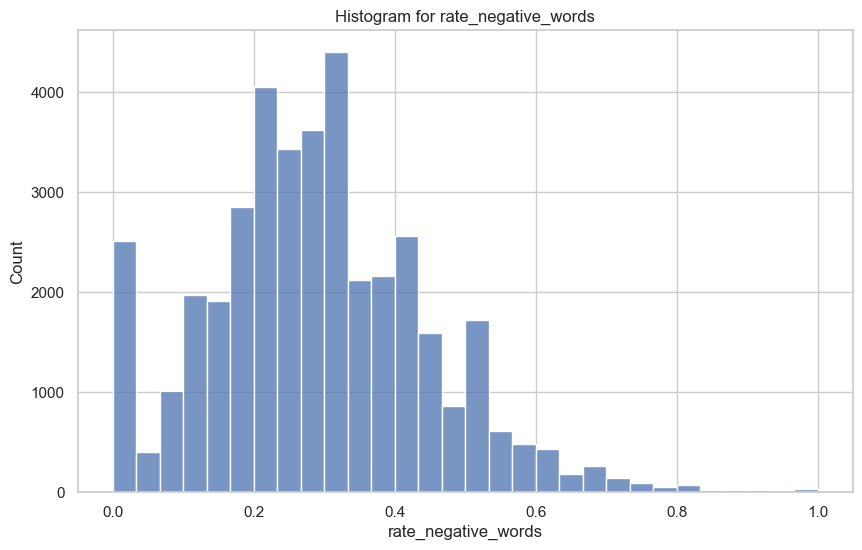

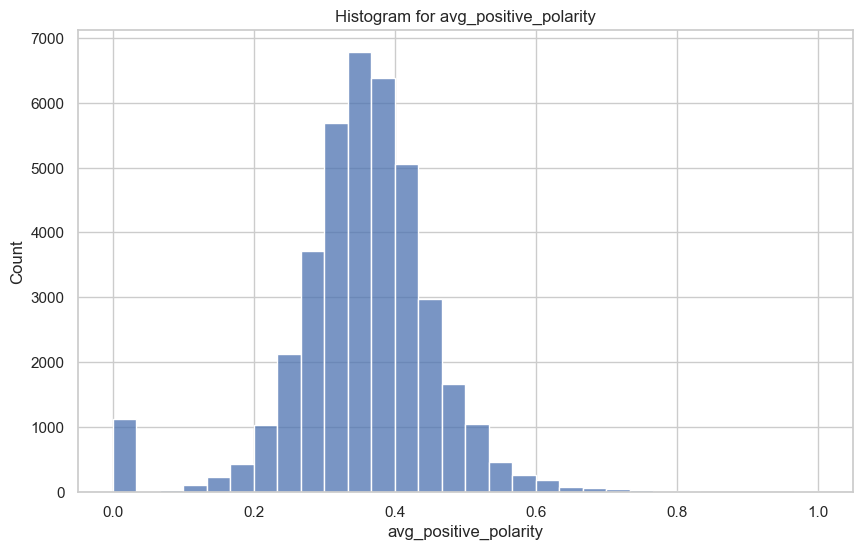

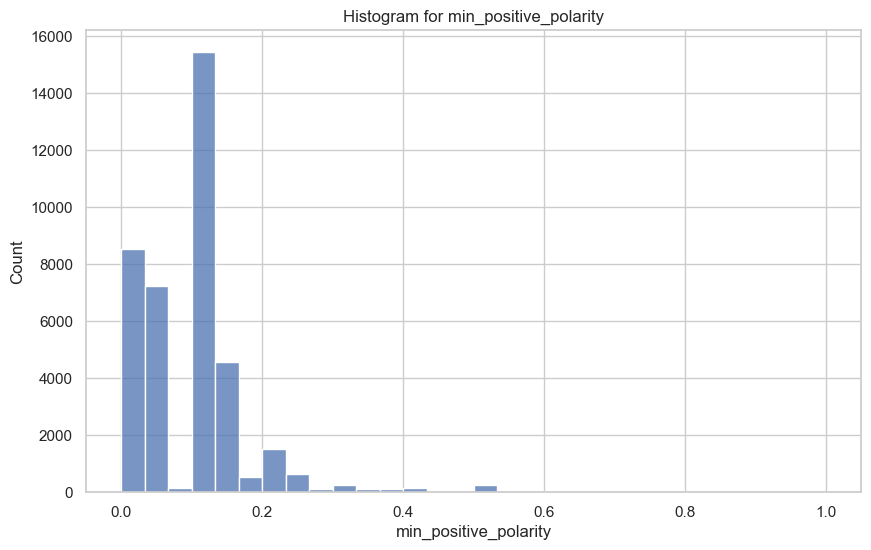

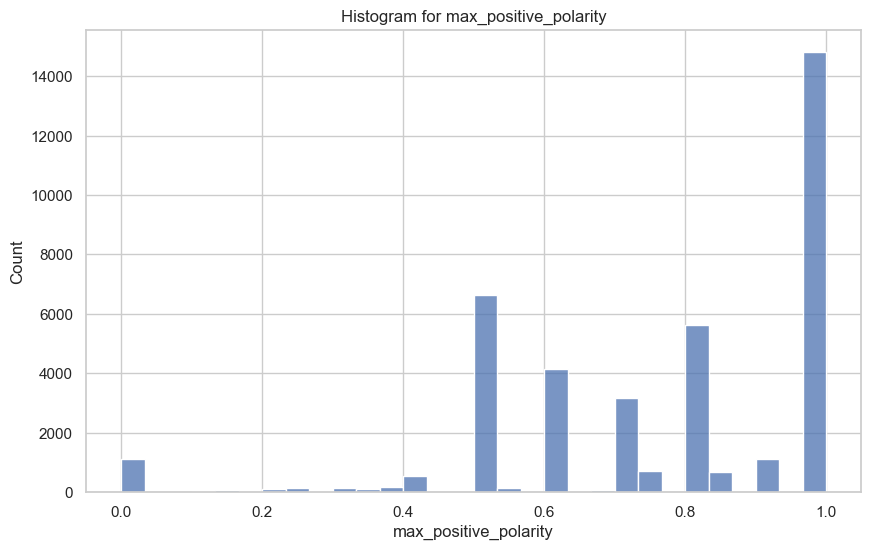

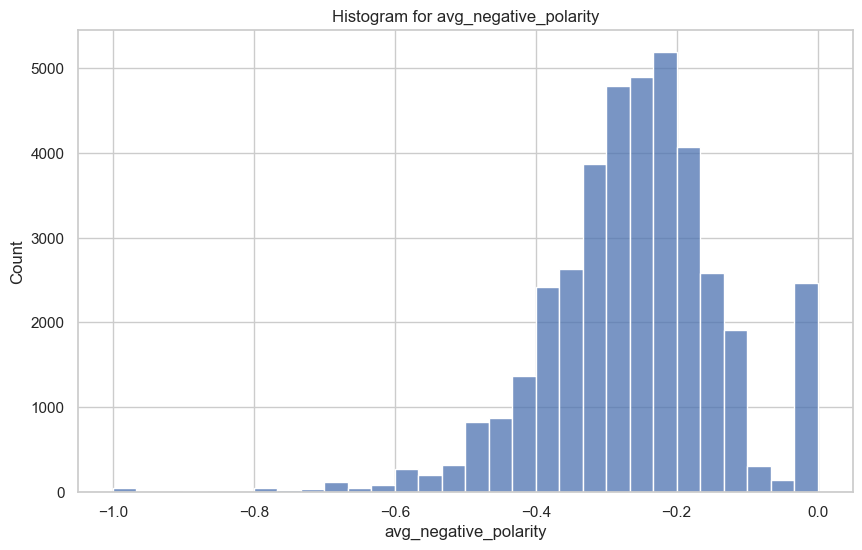

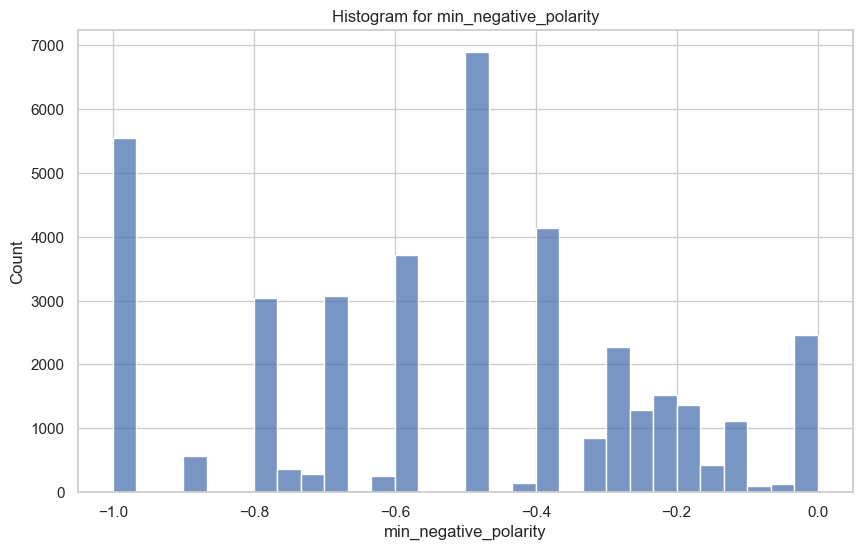

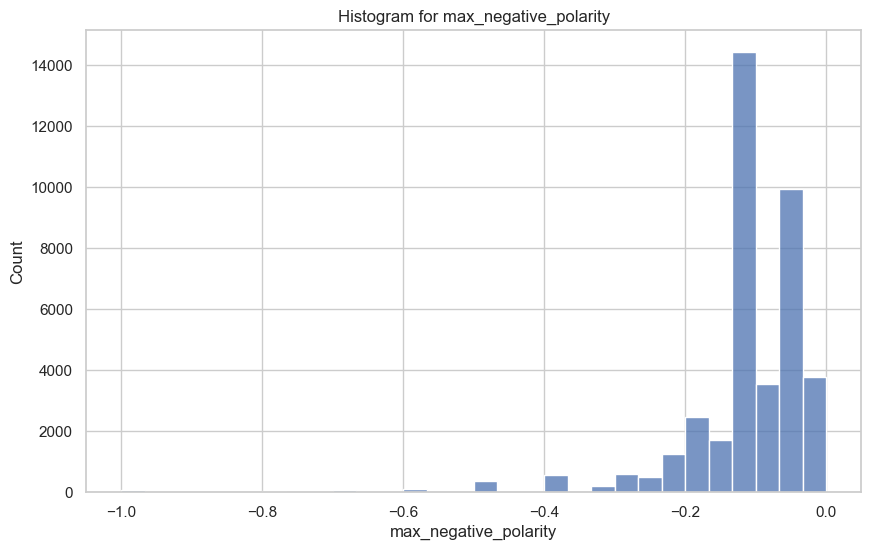

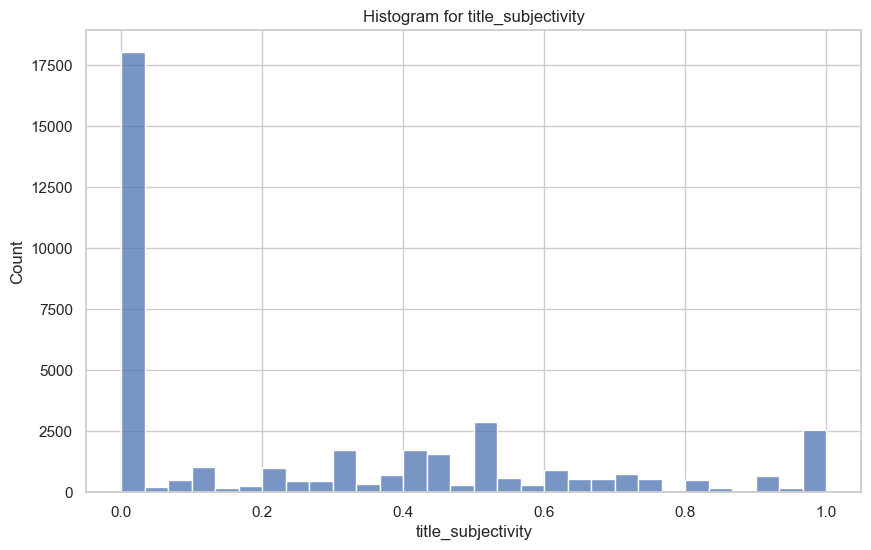

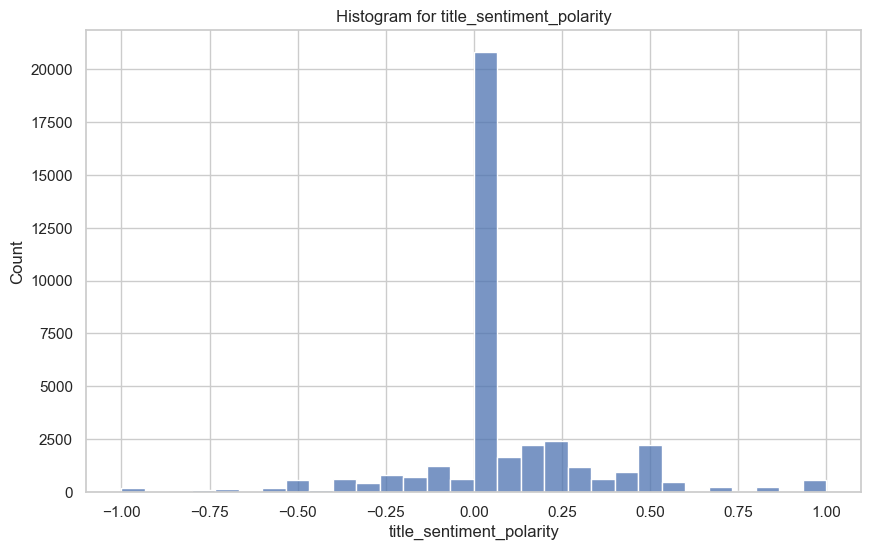

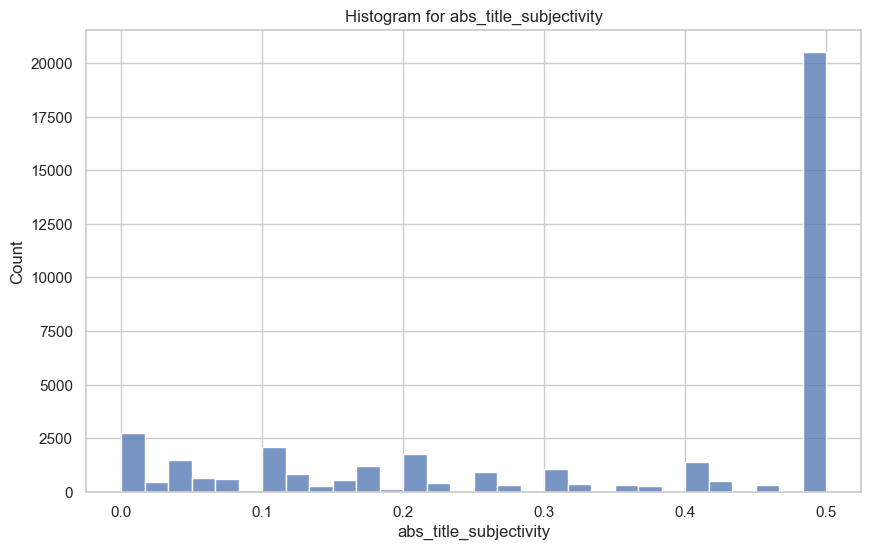

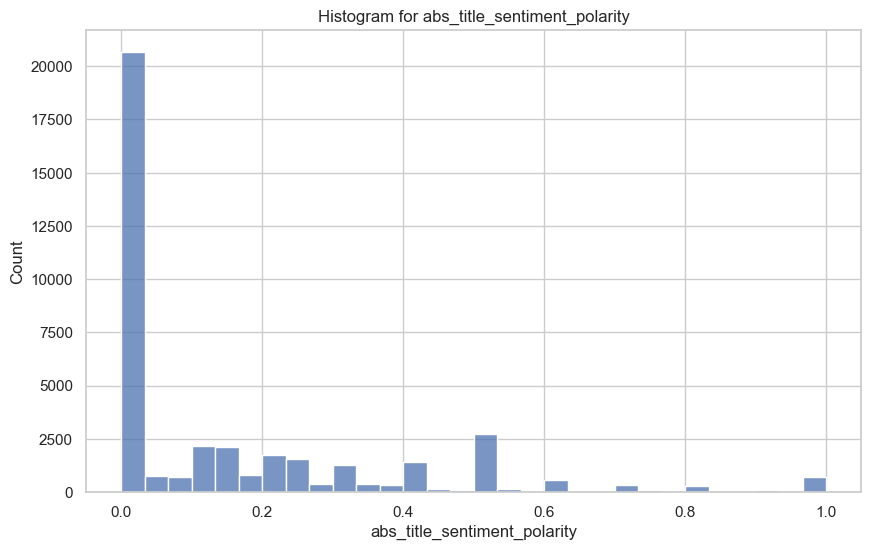

In [257]:
for i in group7[:-1]:
  hist_plot(df,i)
  print("\n")

**Observations**

- Most of the variables are almost normally distributed.
- Most of the sentiment is inclined towards neutral.


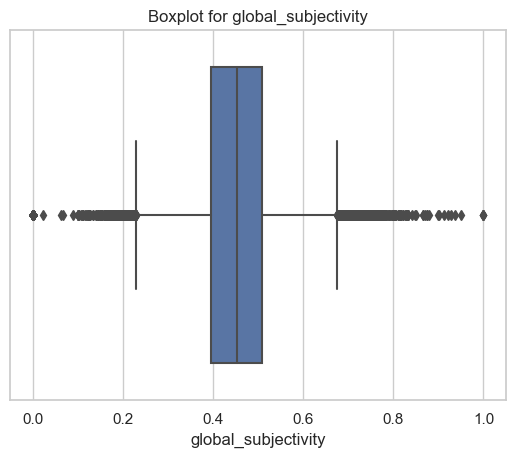

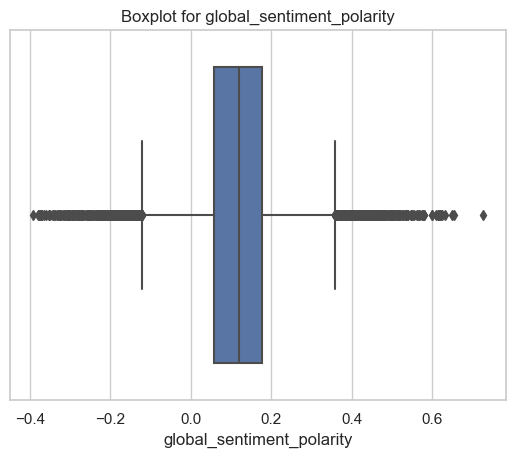

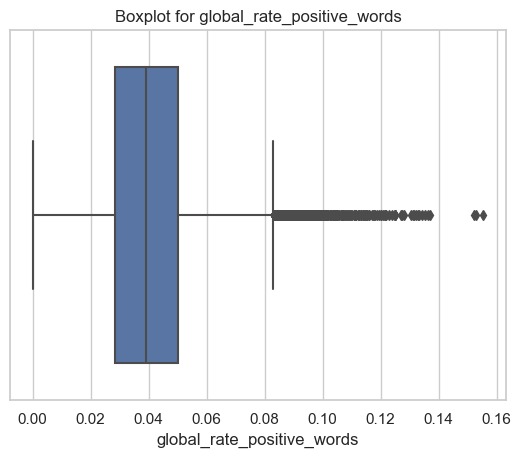

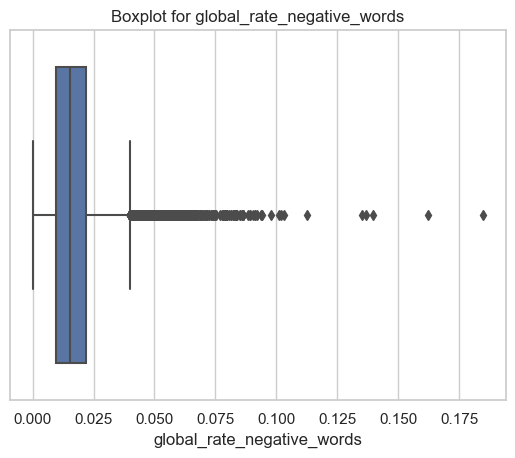

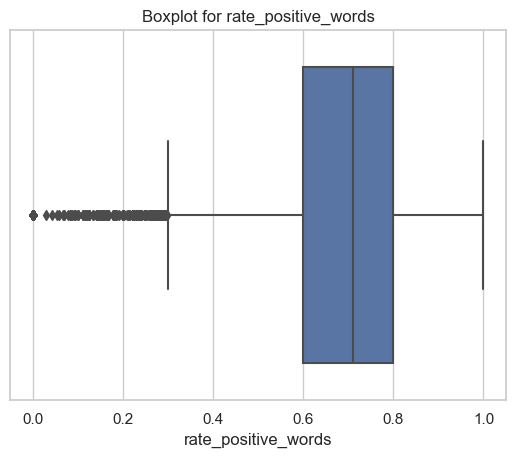

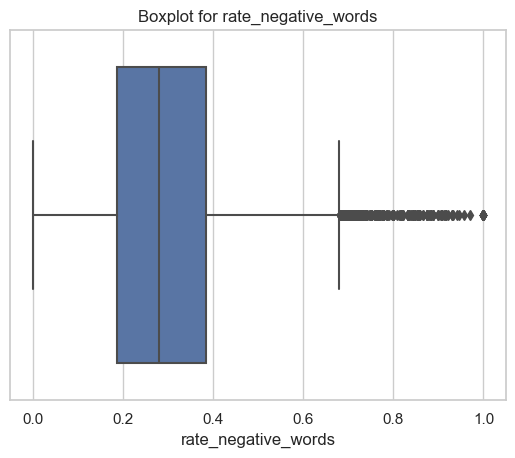

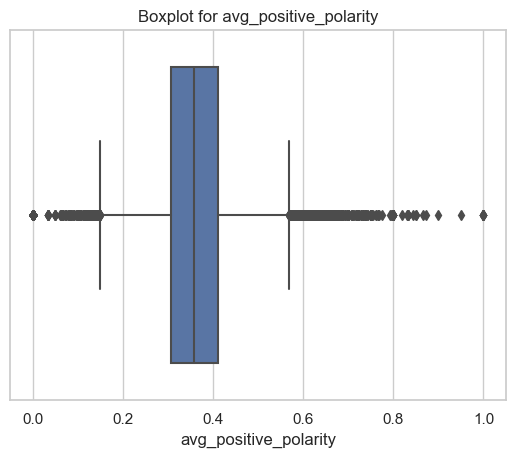

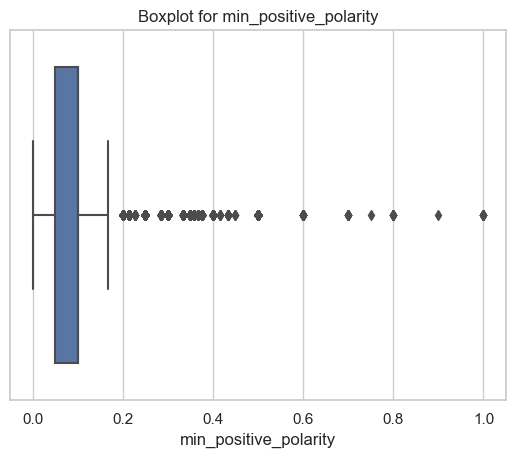

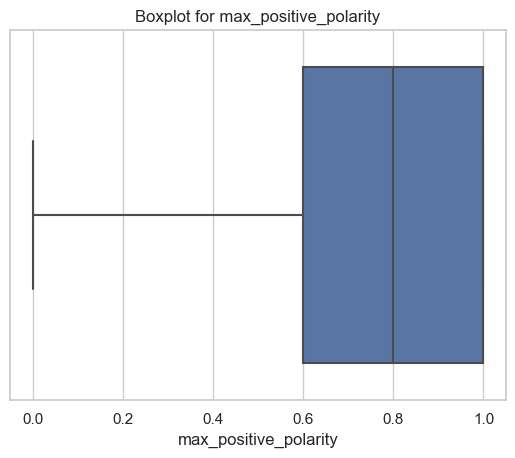

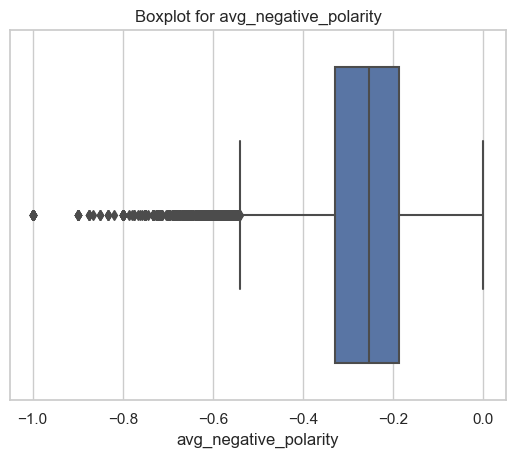

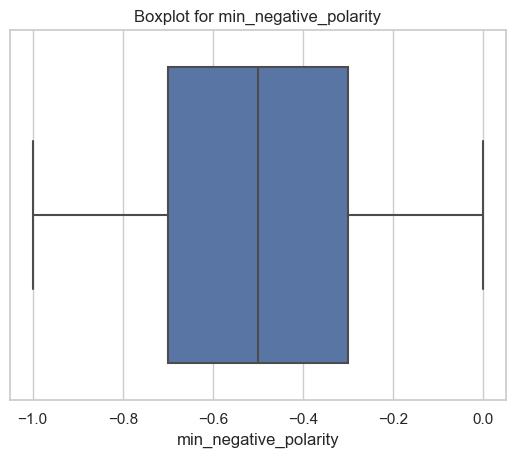

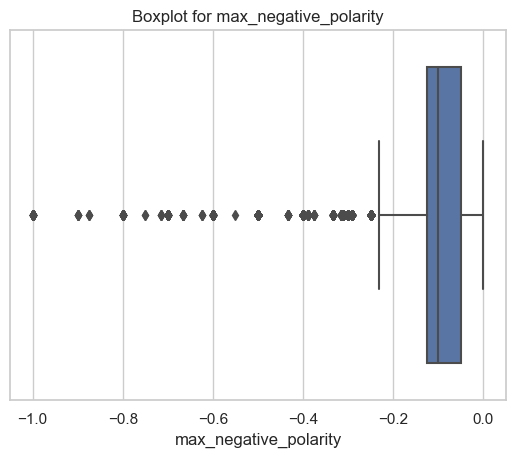

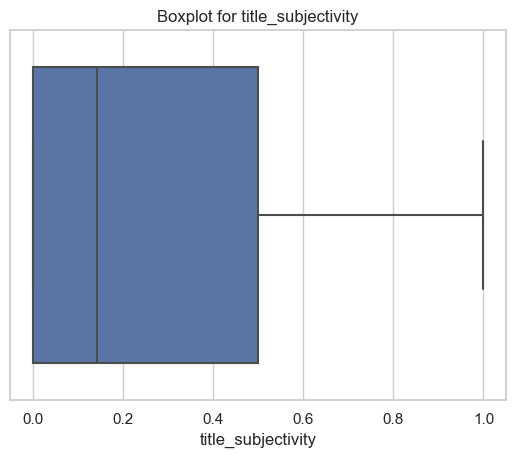

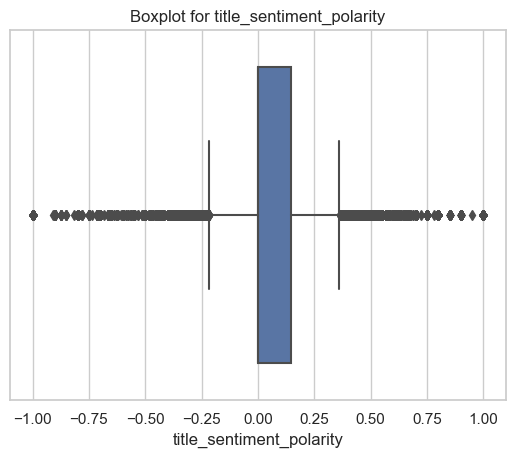

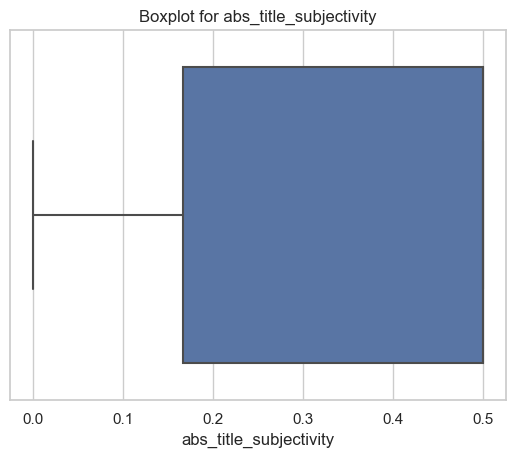

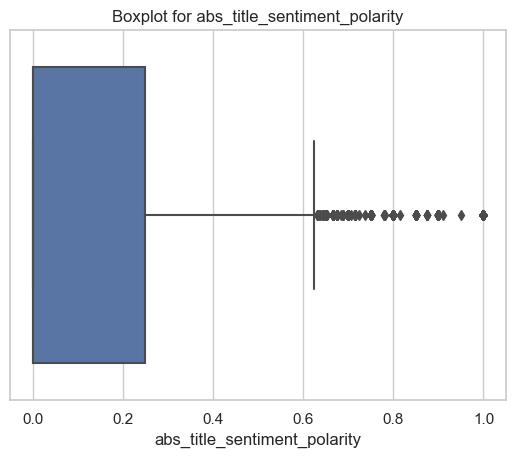

In [258]:
for i in group7[:-1]:
  box_plot(df,i)
  print("\n")

### Observations

- Most of the data is already scaled, so no additional data scaling is required.
- Although there are some outliers in certain variables, they are within an acceptable range and are unlikely to affect the model during training.


In [259]:
df.describe()

,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,...,average_token_length_log_scale,num_keywords_log_scale,kw_avg_min_std,kw_min_max_std,kw_max_max_std,kw_avg_max_std,kw_min_avg_std,kw_max_avg_std,kw_avg_avg_std,self_reference_avg_sharess_log_scale
count,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,...,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000,39539.000000
mean,0.674512,0.052960,0.178128,0.158173,0.058550,0.185564,0.212727,0.168138,0.186474,0.187511,...,1.689666,2.077165,-0.003000,0.000015,-0.000014,-0.000068,0.000012,-0.003389,-0.002002,6.684366
std,0.150429,0.223957,0.382625,0.364908,0.234783,0.388759,0.409241,0.373993,0.389494,0.390326,...,0.287302,0.251289,0.907631,1.000049,1.000045,0.999991,1.000036,0.920339,0.972875,3.266934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.693147,-0.504382,-0.235088,-3.513442,-1.920395,-0.982860,-0.927163,-2.377509,0.000000
25%,0.626342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.701061,1.945910,-0.274749,-0.235088,0.423219,-0.640368,-0.981981,-0.343434,-0.571329,6.897957
50%,0.690789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.734315,2.079442,-0.123701,-0.210911,0.423219,-0.109292,-0.081982,-0.213793,-0.202177,7.696667
75%,0.754934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.767378,2.302585,0.071616,-0.098662,0.423219,0.530929,0.826508,0.059683,0.351984,8.556606
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.201829,2.397895,63.876430,14.327925,0.423219,4.322234,2.194570,28.352693,26.138519,13.645079


In [260]:
list_corr = []
for i in df.columns:
  if (i not in group2) and (i not in group5):
    list_corr.append(i)

In [261]:
# X = df_no_outliers_iqr
X = df.drop('shares', axis = 1)
df['shares']= log_scaling(df, 'shares')

y = df.shares


### Variance Inflation Factor (VIF) 
##### Why Perform VIF (Variance Inflation Factor) Analysis?

- **Multicollinearity Detection**: VIF is used to detect multicollinearity among independent variables in a regression model. High multicollinearity can inflate standard errors, making it harder to determine the significance of each predictor. VIF is one of the filtration methods used for feature selection. 

Here we are calculating the VIF for each feature: 



In [262]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                 Feature        VIF
0               n_non_stop_unique_tokens   5.472063
1              data_channel_is_lifestyle   2.346474
2          data_channel_is_entertainment   2.933978
3                    data_channel_is_bus   5.856615
4                 data_channel_is_socmed   2.311155
5                   data_channel_is_tech   6.280180
6                  data_channel_is_world   7.121223
7                      weekday_is_monday   2.892028
8                     weekday_is_tuesday   3.046964
9                   weekday_is_wednesday   3.057917
10                   weekday_is_thursday   3.020789
11                     weekday_is_friday   2.664782
12                   weekday_is_saturday   1.778590
13                                LDA_00  43.523973
14                                LDA_01  26.646823
15                                LDA_02  53.288480
16                                LDA_03  52.789085
17                                LDA_04  58.917355
18          

### Insights:
- **Thresholds for VIF**:
  - VIF values:
    - **1**: No correlation.
    - **1-5**: Moderate multicollinearity.
    - **>5**: Significant multicollinearity.
    - **>10**: High multicollinearity requiring attention.
  
- **Key Observations**:
  - **High VIF**:
    - Features like `LDA_00 (43.52)`, `LDA_02 (53.29)`, `LDA_04 (58.92)`, `rate_positive_words (75.90)` have VIF values far exceeding **10**, indicating severe multicollinearity. These features may be redundant.
  - **Moderate VIF**:
    - `data_channel_is_bus (5.85)` and `avg_negative_polarity (7.54)` suggest some degree of multicollinearity but are less critical than those with extremely high values.
  - **Low VIF**:
    - Features like `num_videos_log_scale (1.38)` and `n_tokens_title_log_scale (1.10)` show minimal multicollinearity and don't pose any concerns for the model.
  
- **Impact on Model**:
  - High multicollinearity could inflate the variance of coefficients, making the model less reliable and potentially causing overfitting.

In [263]:
# Drop features with very high VIF (>10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
df_reduced = X.drop(columns=high_vif_features)  # Remove high VIF features before PCA

In [264]:
group1 = remove_col(df_reduced, group1)
group2 = remove_col(df_reduced, group2)  # categorical binary
group3 = remove_col(df_reduced, group3)
group4 = remove_col(df_reduced, group4)
group5 = remove_col(df_reduced, group5)  # categorical binary
group6 = remove_col(df_reduced, group6)
group7 = remove_col(df_reduced, group7)

### Principal Component Analysis (PCA) 

In this analysis, we utilized Principal Component Analysis (PCA) to reduce the dimensionality of our dataset while retaining a significant portion of its variance.


We used only continuous features for PCA, as binary features are not recommended for principal components analysis. However, based on VIF scores, some binary columns showed strong VIF values. Therefore, we created two groups:
1. Continuous features that were fed into PCA to obtain components.
2. Binary columns where PCA was not applied.

**PCA Grouping**: We have only used continuous features in PCA. 
   - Features included for PCA:
     - `PCA_group`: Features not in `group2` or `group5`
     - `non_PCA`: Features included in `group2` or `group5`



In [265]:
PCA_group = []
non_PCA = []
for i in df_reduced.columns:
    if (i not in group2) and (i not in group5):
        PCA_group.append(i)

    else:
      non_PCA.append(i)

As a standard practice, we have set the number of components to achieve a variance explanation of 95%. This means that the PCA components we derive will account for 95% of the total variance.

In [266]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(df_reduced[PCA_group])

# Output the number of components retained
print(f'Original number of features: {df_reduced[PCA_group].shape[1]}')
print(f'Number of PCA components: {X_pca.shape[1]}')

print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f'Total variance explained by selected components: {sum(pca.explained_variance_ratio_)}')

Original number of features: 29
Number of PCA components: 10
[0.54064584 0.12071873 0.07814638 0.05342838 0.05003127 0.03153333
 0.02772018 0.02418189 0.01908331 0.01368443]
Total variance explained by selected components: 0.9591737339677409


### Transformation of selected features into Principal Components

We transformed the selected features into principal components, which represent the most critical information from the original feature set. This transformation not only simplifies our dataset but also helps mitigate issues related to multicollinearity and overfitting.

After applying PCA, we constructed a new DataFrame, df_pca, containing the principal components, and combined it with the remaining features in df_gp2 that were not selected for PCA.

The resulting dataset, new_df, serves as our final feature set, with X representing the independent variables and y representing the target variable, shares.

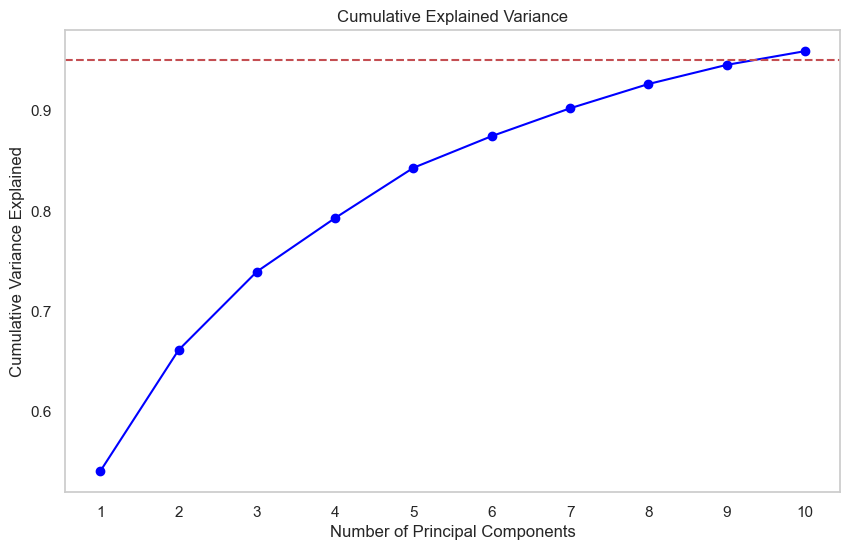

In [267]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line for 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

## Cumulative Explained Variance

#### Key Observations:

1. **Explained Variance**:
   - The graph shows the cumulative variance explained by increasing the number of principal components.
   - The curve gradually levels off, indicating diminishing returns in variance explained as more components are added.

2. **Explained Variance Threshold**:
   - The red dashed line indicates a common threshold used to select the number of components. 
   - The point where the curve meets this line represents the number of principal components needed to explain 90% of the variance.

3. **Optimal Number of Components**:
   - Based on the graph, around **8 components** explain roughly **90% of the variance**.
   - Beyond this point, adding more components does not significantly increase the explained variance, suggesting that these 8 components capture most of the variability in the data.


In [268]:
pca = PCA(n_components=8)  # Specify the number of components again if you want
X_pca = pca.fit_transform(df_reduced[PCA_group])

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [269]:
df_gp2 = df_reduced[non_PCA].reset_index().drop('index', axis = 1)
new_df = pd.concat([df_gp2, df_pca], axis = 1)
X = new_df
y = df['shares']

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Dimnesionality Reduction:
- Selecting **8 principal components** strikes a balance between dimensionality reduction and information retention. 
- Adding more components beyond this point offers diminishing returns in terms of explained variance.

### Linear Regression:

To assess the performance of our linear regression model with the selected features, we employed cross-validation, a robust technique that helps ensure our model generalizes well to unseen data. By splitting the training dataset into multiple subsets, we can evaluate the model's performance on different portions of the data. In this case, we used 5-fold cross-validation, where the dataset is divided into five equal parts. The model is trained on four parts and tested on the remaining part, repeating this process for each fold. This approach allows us to calculate R-squared scores for each fold, providing insights into how well the model explains the variability in the target variable.

In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Using cross-validation to evaluate the model with the selected features
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average CV R-squared Score: {np.mean(cv_scores)}")


Cross-Validation R-squared Scores: [0.09849504 0.09832751 0.09232093 0.10347274 0.08438576]
Average CV R-squared Score: 0.09540039719944145


### XGBoost
We use XGBoost after PCA to leverage the reduced feature set, which retains the most informative aspects of the data while eliminating noise. This helps the model capture complex relationships more effectively and improves stability and generalization. Additionally, the reduced dimensionality allows for faster training and prediction. Overall, this combination enhances model performance while simplifying the workflow.

In [272]:
pip install xgboost


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [273]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')


In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

### HyperParameter Tuning
The following grid enables systematic hyperparameter tuning to find the best model settings for improved predictive performance.


- max_depth: Controls the maximum depth of the trees, allowing exploration of model complexity and performance trade-offs.

- learning_rate: Adjusts the size of weight updates during training, helping to balance convergence speed and accuracy.

- n_estimators: Specifies the number of trees to build, enabling evaluation of how tree quantity affects performance and overfitting.



In [275]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100 ,150, 200]
}

In [276]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', n_jobs=-1)

In [277]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [278]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [279]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared on Training Data: {r2_train}")


# Evaluate performance (e.g., RMSE, R-squared)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R-squared on test data: {r2}")

R-squared on Training Data: 0.18933934941306785
RMSE: 0.8634342662426113, R-squared on test data: 0.1467229770872711


### Poly fit LR
Here, we have adjusted the polynomial degree of 2 based on our data.

In [280]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)  # Transform X into polynomial features

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Make predictions
y_pred = model.predict(X_poly)


# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average CV R-squared Score: {np.mean(cv_scores)}")


Cross-Validation R-squared Scores: [0.11065313 0.12625423 0.12208869 0.13139557 0.11004992]
Average CV R-squared Score: 0.1200883075975373


### Conclusion

1. **Linear Regression**:
   - The model produced consistently low R-squared values across 5-fold cross-validation, with an average R-squared of **0.09540**. This indicates that the model has limited explanatory power and is not capturing the underlying patterns well.

2. **XGBoost**:
   - The model performed slightly better, achieving an R-squared of **0.21455** on the training data. However, the R-squared on the test data dropped to **0.1519**, indicating possible overfitting and a lack of generalization to unseen data.

3. **Polynomial Regression (2nd Degree)**:
   - This model showed a slight improvement over linear regression, with an average R-squared of **0.14949** across cross-validation folds. While it performed better, the improvement was minimal, suggesting limited benefit from adding polynomial terms.

Overall, the models show modest performance in explaining the variance in the data, with none of the approaches yielding high predictive accuracy. XGBoost performed marginally better than the linear models, but further tuning or feature engineering is likely needed to improve model performance or maybe other modelling techniques could be explored for this problem statement.
